#<font color = '33E8FF' size = '5'><b>Problem Statement</b></font>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 


The company is looking at prospective properties to buy to enter the market.




**Business Objective**



The aim is to understand the factors affecting the prices. The company wants to know:



*   Which variables are significant in predicting the price of a house
*   How well those variables describe the price of a house.




# <font color='33E8FF' size='5'><b>Reading and Understanding Data</b></font>

We will import the dataset and understand the varaibles and its contents

In [132]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [133]:
# suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [134]:
#read the dataset into the datframe
housing_df=pd.read_csv("train.csv")

In [135]:
# Check the head of the dataset
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [136]:
#shape of the dataframe
housing_df.shape

(1460, 81)

In [137]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [138]:
#describe the numerical variable of the data frame
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<font color='Green' size='3'><b>Inference :</b></font> There are 81 coloumns 
and 1460 rows. There are some/empty null values in the dataset.

#<font color='33E8FF' size='5'><b>Data **Visualization**</b></font>

* We will check does some multicollinearity between diffrent variables exist.<br>
* Identify Variables which have no relation with dependent variable,have high variance or have leaky features 

In [139]:
# lets validate the value counts for all the columns
for i in housing_df.columns:
    print(i, housing_df[i].astype('category').value_counts())

Id 1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
MSSubClass 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
MSZoning RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
LotFrontage 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
39.0       1
111.0      1
112.0      1
128.0      1
Name: LotFrontage, Length: 110, dtype: int64
LotArea 7200      25
9600      24
6000      17
9000      14
10800     14
          ..
8930       1
8935       1
8944       1
8960       1
215245     1
Name: LotArea, Length: 1073, dtype: int64
Street Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley Grvl    50
Pave    41
Name: Alley, dtype: int64
LotShape Reg    92

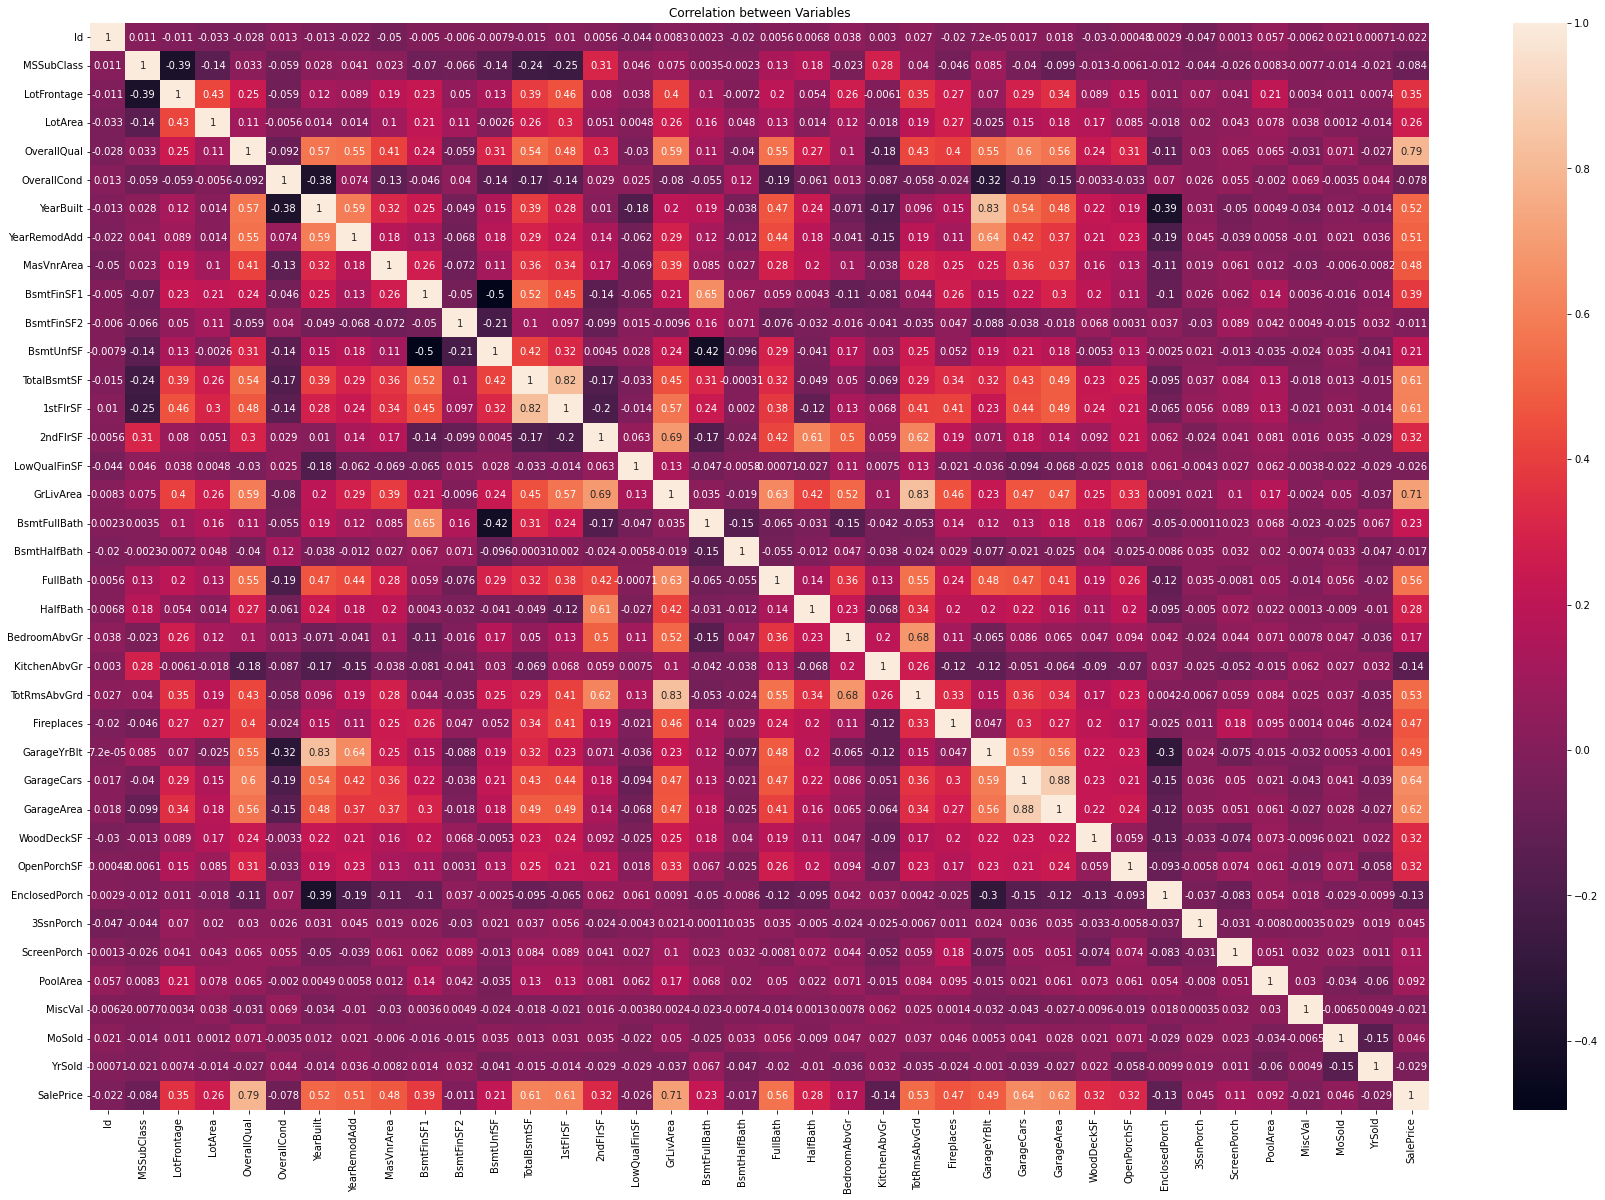

In [140]:
# lets visualize the coorelation for all the columns and for dependent variable
plt.figure(figsize = (30, 20))
hm = sns.heatmap(housing_df.corr(), annot = True)
hm.set_title('Correlation between Variables')
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 
From the above observations we can conclude the following:


*   Variable **id** have a high variance 
*   Variable **Street** and **Utilities**have a low variance 
*   Variable **MoSold** is a leaky feature
*   Variable **GrLivArea** and **TotRmsAbvGrd** shows strong positive    correlation
*   Variable **GarageCars** and **GarageArea** shows strong positive correlation
*   Variable **GrLivArea** and **2ndFlrSF** shows strong positive correlation
*   Variable **1stFlrSF** and **TotalBsmtSF** shows strong positive correlation


We would be dropping those columns from our data set and this would add lot of disturbance and noise to our analysis

#<font color='33E8FF' size='5'><b>Data Handling/ Cleansing</b></font>

Here we will perform the following:

1.   Dropping the duplicate values
2.   Dropping the columns identified above
3.   Fix the missing values
4.   Clean the values and impute proper values for Variables
5.   Adjust the datatypes 
6.   Treating Outliers

In [141]:
##Checking and dropping duplicated records(if any)
housing_df = housing_df.drop_duplicates()

In [142]:
housing_df.shape

(1460, 81)

In [143]:
#droping the variable identifed above from the data set
housing_df.drop(columns = ['Id','Street','MoSold','Utilities','TotRmsAbvGrd','GarageCars','1stFlrSF','2ndFlrSF'],inplace=True)

In [144]:
# get the new shape of the data frame
housing_df.shape

(1460, 73)

In [145]:
##Fixing NA from Categorical columns as they are meaningfull values and replace with 'None'
cat_na_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for col in cat_na_cols:
  housing_df[col] = housing_df[col].fillna('None')

In [146]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [147]:
# checking amoung of null values prese4nt
round(housing_df.isnull().sum()/len(housing_df.index),2).sort_values(ascending=False).head(10)

LotFrontage     0.18
GarageYrBlt     0.06
MasVnrArea      0.01
MSSubClass      0.00
KitchenAbvGr    0.00
GarageType      0.00
FireplaceQu     0.00
Fireplaces      0.00
Functional      0.00
KitchenQual     0.00
dtype: float64

Since the null values are less than 25%, we would impute the values in the columns LotFrontage,GarageYrBlt and MasVnrArea

In [148]:
# descirbe the values in the columns
housing_df[['LotFrontage','GarageYrBlt','MasVnrArea']].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [149]:
#Impute the null values with median values for 'LotFrontage','GarageYrBlt' and 'MasVnrArea' columns

housing_df['LotFrontage'] = housing_df['LotFrontage'].replace(np.nan, housing_df['LotFrontage'].median())
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].replace(np.nan, housing_df['MasVnrArea'].median())
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].replace(np.nan, housing_df['GarageYrBlt'].median())

In [150]:
# checking amoung of null values prese4nt
round(housing_df.isnull().sum()/len(housing_df.index),2).sort_values(ascending=False).head(10)

MSSubClass      0.0
HeatingQC       0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
dtype: float64

In [151]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [152]:
 # from above we notice variable 'Electrical' have one missing entry,let's replace this with None value
 housing_df['Electrical'] = housing_df['Electrical'].fillna('None')


In [153]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

From the above we can infer there is no mismatch of the data types

### Outlier Treatment

In [154]:
# check for outlieres in the continous values
housing_df.describe(percentiles=[0.1,0.25,0.5,0.75,0.90,0.95,0.99,1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,1978.589041,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,23.997022,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
10%,20.000000,49.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1948.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,106475.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1962.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2006.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,2007.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,2010.000000,326100.000000


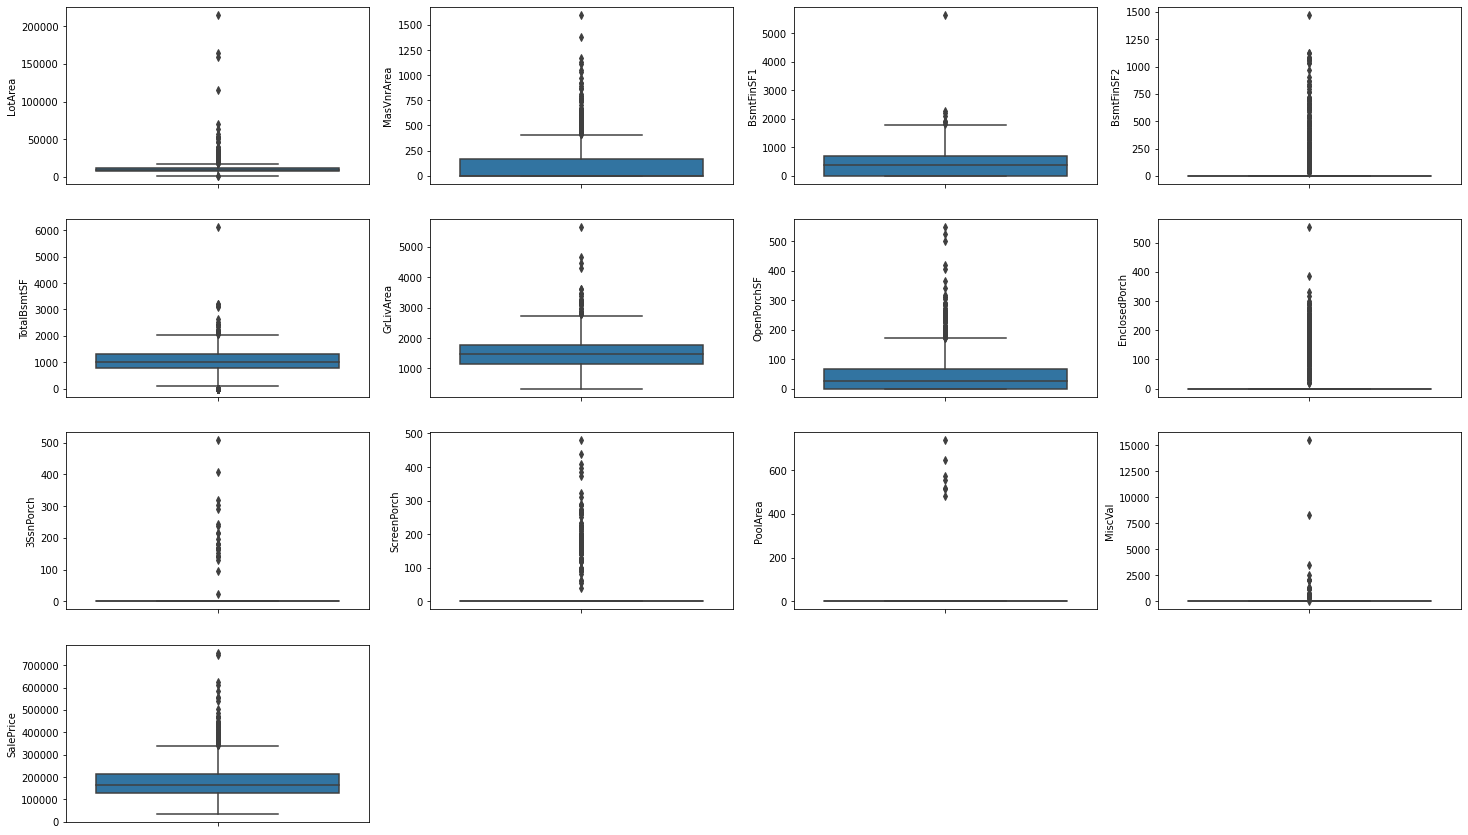

In [155]:
#visualizing of categorical variables using boxplot
plt.figure(figsize=(25, 15))
plt.subplot(4,4,1)
sns.boxplot(y = 'LotArea', data = housing_df)
plt.subplot(4,4,2)
sns.boxplot(y = 'MasVnrArea', data = housing_df)
plt.subplot(4,4,3)
sns.boxplot(y = 'BsmtFinSF1', data = housing_df)
plt.subplot(4,4,4)
sns.boxplot(y = 'BsmtFinSF2', data = housing_df)
plt.subplot(4,4,5)
sns.boxplot(y = 'TotalBsmtSF', data = housing_df)
plt.subplot(4,4,6)
sns.boxplot(y = 'GrLivArea', data = housing_df)
plt.subplot(4,4,7)
sns.boxplot(y = 'OpenPorchSF', data = housing_df)
plt.subplot(4,4,8)
sns.boxplot(y = 'EnclosedPorch', data = housing_df)
plt.subplot(4,4,9)
sns.boxplot(y = '3SsnPorch', data = housing_df)
plt.subplot(4,4,10)
sns.boxplot(y = 'ScreenPorch', data = housing_df)
plt.subplot(4,4,11)
sns.boxplot(y = 'PoolArea', data = housing_df)
plt.subplot(4,4,12)
sns.boxplot(y = 'MiscVal', data = housing_df)
plt.subplot(4,4,13)
sns.boxplot(y = 'SalePrice', data = housing_df)

plt.show()

In [156]:
##Removing the Outliers, removing values beyond 99%

#Lot Area
df_LotArea = housing_df['LotArea'].quantile(0.99)
housing_df = housing_df[housing_df["LotArea"] <= df_LotArea]

#MasVnrArea
df_MasVnrArea = housing_df['MasVnrArea'].quantile(0.99)
housing_df = housing_df[housing_df["MasVnrArea"] <= df_MasVnrArea]

# BsmtFinSF1
df_BsmtFinSF1 = housing_df['BsmtFinSF1'].quantile(0.99)
housing_df = housing_df[housing_df["BsmtFinSF1"] <= df_BsmtFinSF1]

# BsmtFinSF2
df_BsmtFinSF2 = housing_df['BsmtFinSF2'].quantile(0.99)
housing_df = housing_df[housing_df["BsmtFinSF2"] <= df_BsmtFinSF2]

# TotalBsmtSF
df_TotalBsmtSF = housing_df['TotalBsmtSF'].quantile(0.99)
housing_df = housing_df[housing_df["TotalBsmtSF"] <= df_TotalBsmtSF]

# GrLivArea
df_GrLivArea = housing_df['GrLivArea'].quantile(0.99)
housing_df = housing_df[housing_df["GrLivArea"] <= df_GrLivArea]

# OpenPorchSF
df_OpenPorchSF = housing_df['OpenPorchSF'].quantile(0.99)
housing_df = housing_df[housing_df["OpenPorchSF"] <= df_OpenPorchSF]

# EnclosedPorch
df_EnclosedPorch = housing_df['EnclosedPorch'].quantile(0.99)
housing_df = housing_df[housing_df["EnclosedPorch"] <= df_EnclosedPorch]

# 3SsnPorch
df_3SsnPorch = housing_df['3SsnPorch'].quantile(0.99)
housing_df = housing_df[housing_df["3SsnPorch"] <= df_3SsnPorch]

# ScreenPorch
df_ScreenPorch = housing_df['ScreenPorch'].quantile(0.99)
housing_df = housing_df[housing_df["ScreenPorch"] <= df_ScreenPorch]

# MiscVal
df_MiscVal = housing_df['MiscVal'].quantile(0.99)
housing_df = housing_df[housing_df["MiscVal"] <= df_MiscVal]

# SalePrice
df_SalePrice = housing_df['SalePrice'].quantile(0.99)
housing_df = housing_df[housing_df["SalePrice"] <= df_SalePrice]


In [157]:
# check for outlieres in the continous values
housing_df.describe(percentiles=[0.1,0.25,0.5,0.75,0.90,0.95,0.99,1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000
mean,57.501939,68.547711,9451.712956,5.975175,5.567106,1971.172227,1984.193173,84.810706,409.194725,35.252133,560.749418,1005.196276,4.792863,1444.017067,0.401086,0.057409,1.533747,0.366951,2.842514,1.047324,0.555469,1978.238169,457.029480,89.674942,41.602793,19.679597,1.041893,10.645462,1.522110,10.600465,2007.813809,169074.622964
std,42.603603,20.529393,4012.957943,1.298352,1.104917,29.773860,20.807176,139.961263,400.040175,123.742335,428.162829,365.407304,42.591805,433.753518,0.507428,0.239292,0.530719,0.498002,0.787633,0.223108,0.616973,23.952753,203.092055,119.802739,55.495835,54.133079,12.374643,41.975360,31.688233,70.595137,1.329700,60792.190981
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,35311.000000
10%,20.000000,47.000000,4604.400000,4.000000,5.000000,1925.000000,1950.000000,0.000000,0.000000,0.000000,76.000000,625.800000,0.000000,898.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1946.800000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,103920.000000
25%,20.000000,60.000000,7259.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,221.000000,780.000000,0.000000,1111.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1962.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,128000.000000
50%,50.000000,69.000000,9170.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,364.000000,0.000000,480.000000,960.000000,0.000000,1416.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1980.000000,466.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,157000.000000
75%,70.000000,78.000000,11200.000000,7.000000,6.000000,2000.000000,2004.000000,138.000000,686.000000,0.000000,798.000000,1228.000000,0.000000,1714.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2001.000000,573.000000,166.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,200000.000000
90%,120.000000,90.000000,13654.600000,8.000000,7.000000,2005.000000,2006.000000,292.200000,994.800000,33.600000,1202.400000,1500.200000,0.000000,2020.200000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2005.000000,702.000000,250.000000,122.200000,105.600000,0.000000,0.000000,0.000000,0.000000,2010.000000,255100.000000
95%,160.000000,100.000000,15967.800000,8.000000,8.000000,2007.000000,2007.000000,379.200000,1172.600000,331.200000,1431.600000,1655.200000,0.000000,2262.600000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,2007.000000,826.000000,320.000000,159.600000,164.000000,0.000000,124.400000,0.000000,0.000000,2010.000000,290000.000000


### Deriving Extra Columns

In [158]:
##Derive a new variable named 'AgeofProperty' to determine the age of property

housing_df['AgeofProperty'] = housing_df['YrSold'] - housing_df['YearBuilt']
housing_df.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,AgeofProperty
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,2008,WD,Normal,223500,7
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,2008,WD,Normal,250000,8
6,20,RL,75.0,10084,None,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,0,1694,1,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,2004.0,RFn,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,2007,WD,Normal,307000,3


In [159]:
##Dropping the old attributes and Year columns
housing_df.drop(columns = ['YearBuilt','YrSold','YearRemodAdd','GarageYrBlt'],inplace=True)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,AgeofProperty
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,WD,Normal,208500,5
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,WD,Normal,181500,31
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,WD,Normal,223500,7
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,WD,Normal,250000,8
6,20,RL,75.0,10084,None,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,0,1694,1,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,RFn,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,WD,Normal,307000,3


In [160]:
# info about the data set
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1289 non-null   int64  
 1   MSZoning       1289 non-null   object 
 2   LotFrontage    1289 non-null   float64
 3   LotArea        1289 non-null   int64  
 4   Alley          1289 non-null   object 
 5   LotShape       1289 non-null   object 
 6   LandContour    1289 non-null   object 
 7   LotConfig      1289 non-null   object 
 8   LandSlope      1289 non-null   object 
 9   Neighborhood   1289 non-null   object 
 10  Condition1     1289 non-null   object 
 11  Condition2     1289 non-null   object 
 12  BldgType       1289 non-null   object 
 13  HouseStyle     1289 non-null   object 
 14  OverallQual    1289 non-null   int64  
 15  OverallCond    1289 non-null   int64  
 16  RoofStyle      1289 non-null   object 
 17  RoofMatl       1289 non-null   object 
 18  Exterior

<font color='Green' size='3'><b>Inference :</b></font> 
All the variable in the dataset have been cleaned for both categorical and numerical variables.

*   Un-required columns removed
*   Categorical variables treated
*   Outliers treated
*   Data set is clean an no Null values exist in the dataset

#<font color='33E8FF' size='5'><b>EDA</b></font>

Here we will perform the following:

1.   Visualization of Variables
2.   Univarite/Bi-Variate Analysis
3.   Visualization of Target Variable

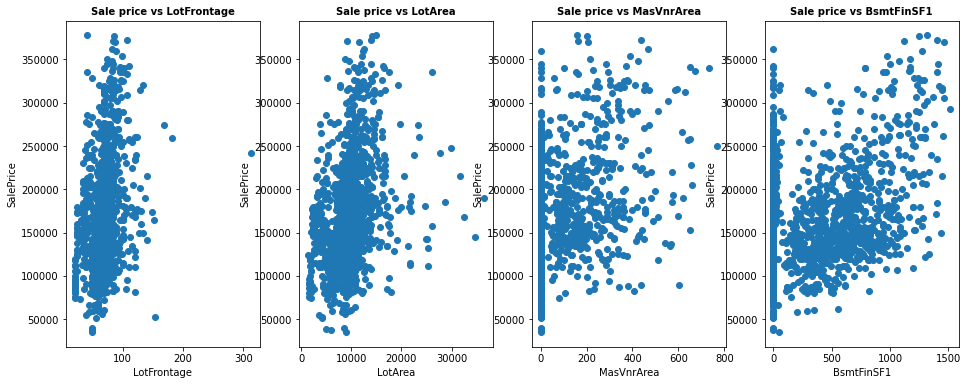

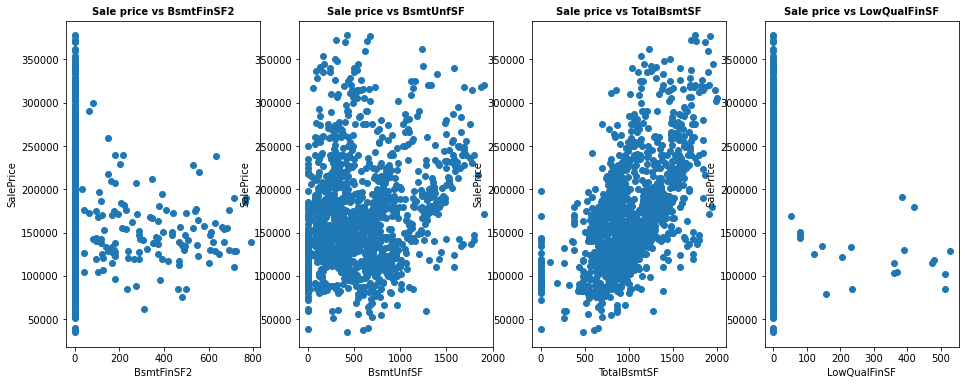

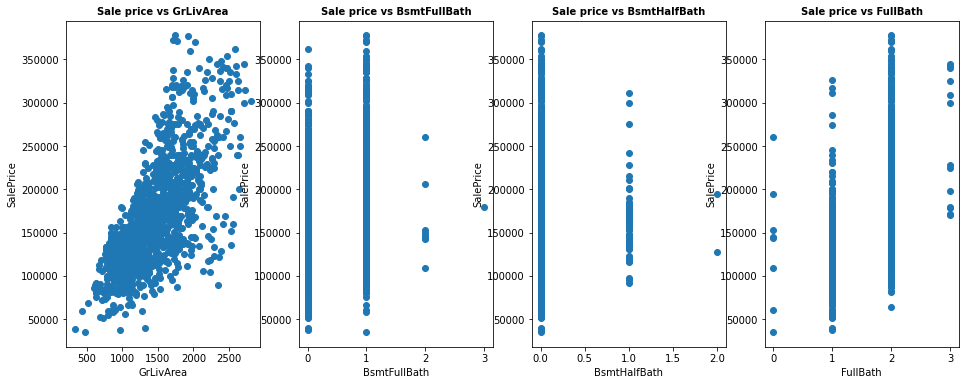

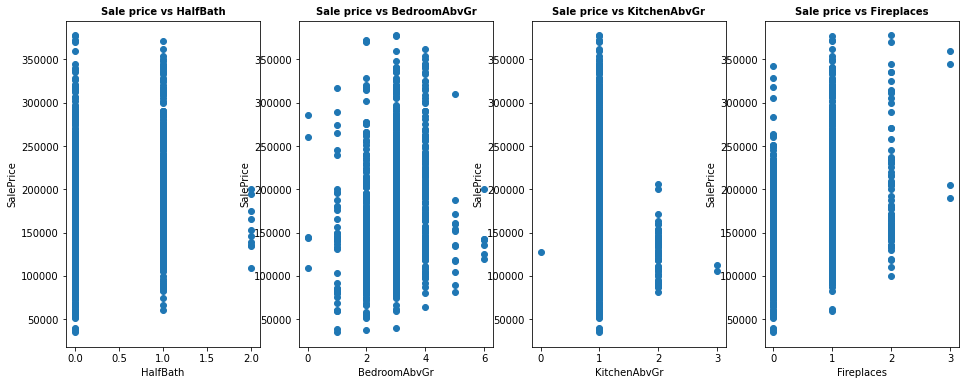

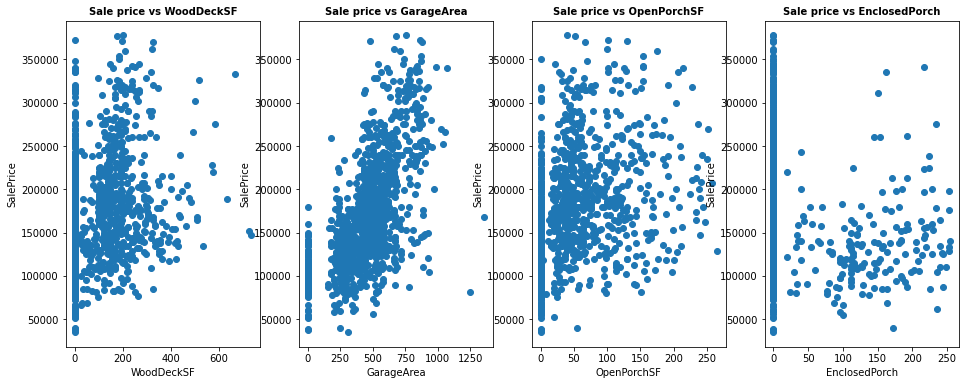

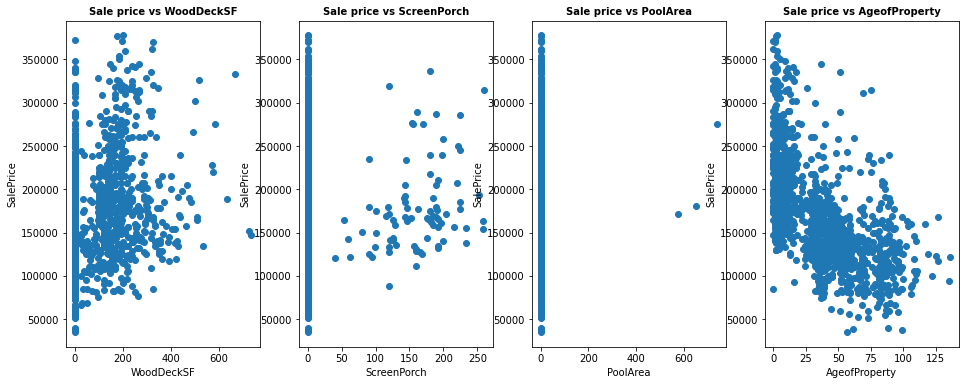

In [161]:
#visualizing of numeric variables
# Function to create scatter plot as subplot
def create_scatter(Fi,Se,Th,Fo):
  plt.figure(figsize=(16,6))
  plt.subplot(1,4,1)
  plt.scatter(housing_df[Fi],housing_df['SalePrice'])
  plt.title("Sale price vs "+Fi, fontweight='bold', fontsize=10)
  plt.xlabel(Fi, fontsize=10)
  plt.ylabel('SalePrice', fontsize=10)

  plt.subplot(1,4,2)
  plt.scatter(housing_df[Se],housing_df['SalePrice'])
  plt.title("Sale price vs "+Se, fontweight='bold', fontsize=10)
  plt.xlabel(Se, fontsize=10)
  plt.ylabel('SalePrice', fontsize=10)

  plt.subplot(1,4,3)
  plt.scatter(housing_df[Th],housing_df['SalePrice'])
  plt.title("Sale price vs "+Th, fontweight='bold', fontsize=10)
  plt.xlabel(Th, fontsize=10)
  plt.ylabel('SalePrice', fontsize=10)

  plt.subplot(1,4,4)
  plt.scatter(housing_df[Fo],housing_df['SalePrice'])
  plt.title("Sale price vs "+Fo, fontweight='bold', fontsize=10)
  plt.xlabel(Fo, fontsize=10)
  plt.ylabel('SalePrice', fontsize=10)

#call the function to generate scatter plots for numeric varialbes
create_scatter('LotFrontage','LotArea','MasVnrArea','BsmtFinSF1')
create_scatter('BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','LowQualFinSF')
create_scatter('GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath')
create_scatter('HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces')
create_scatter('WoodDeckSF','GarageArea','OpenPorchSF','EnclosedPorch')
create_scatter('WoodDeckSF','ScreenPorch','PoolArea','AgeofProperty')

<font color='Green' size='3'><b>Inference :</b></font> 

1.   GrLivArea and TotalBsmntSF follows a linear relationship
2.   As the age of the property increases the sales price decreases


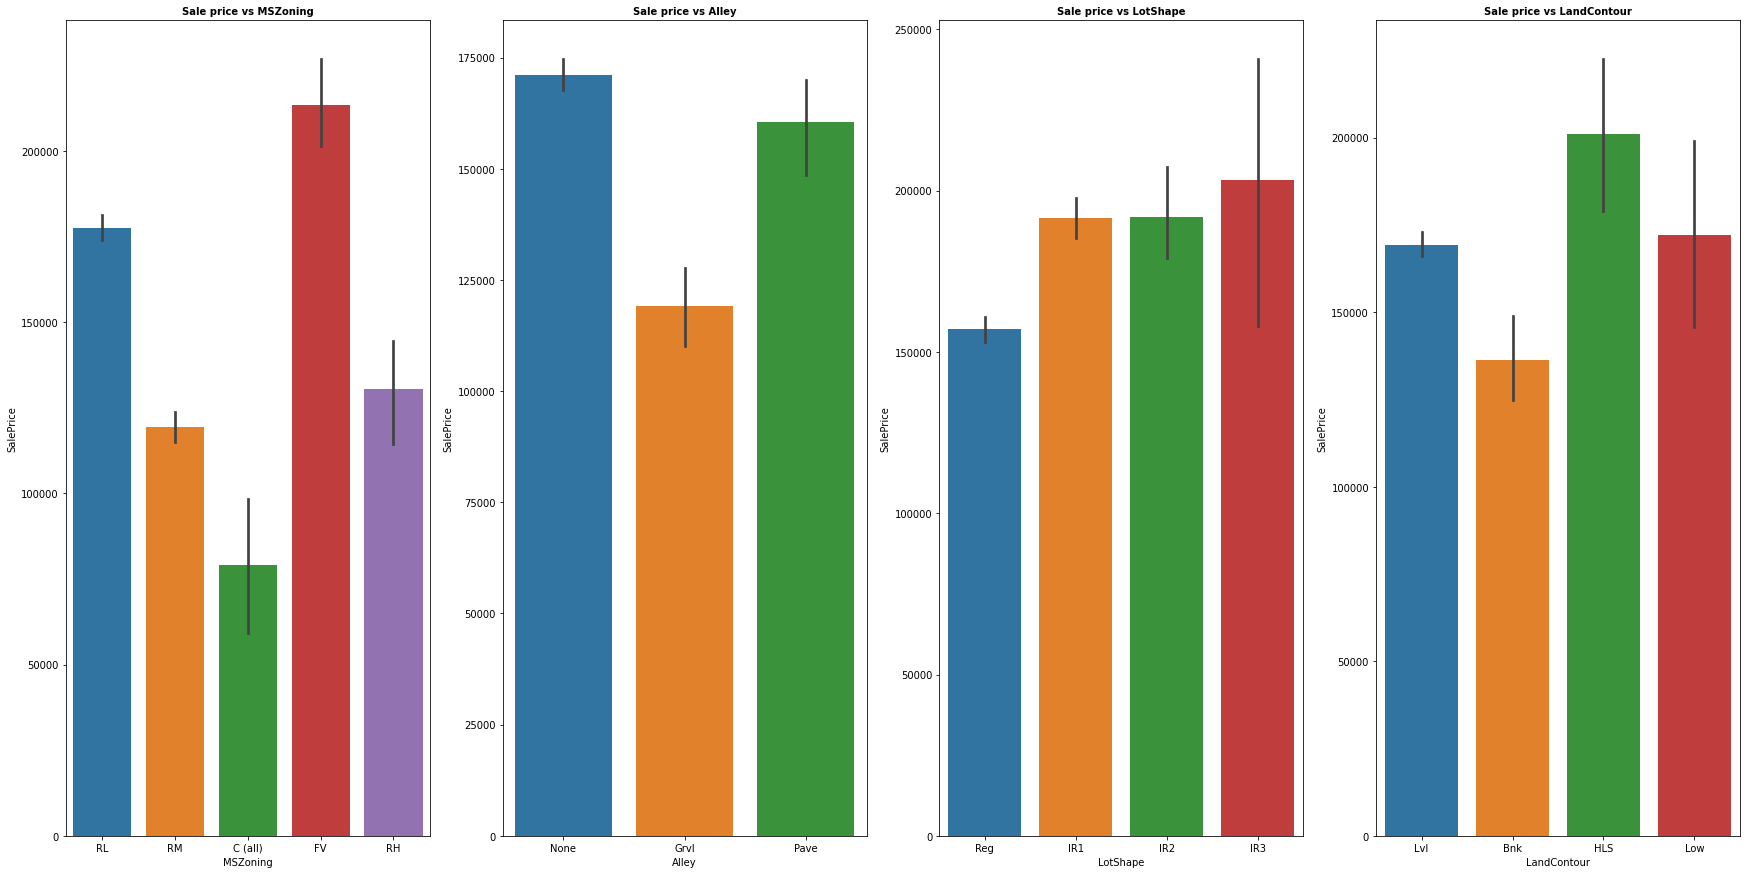

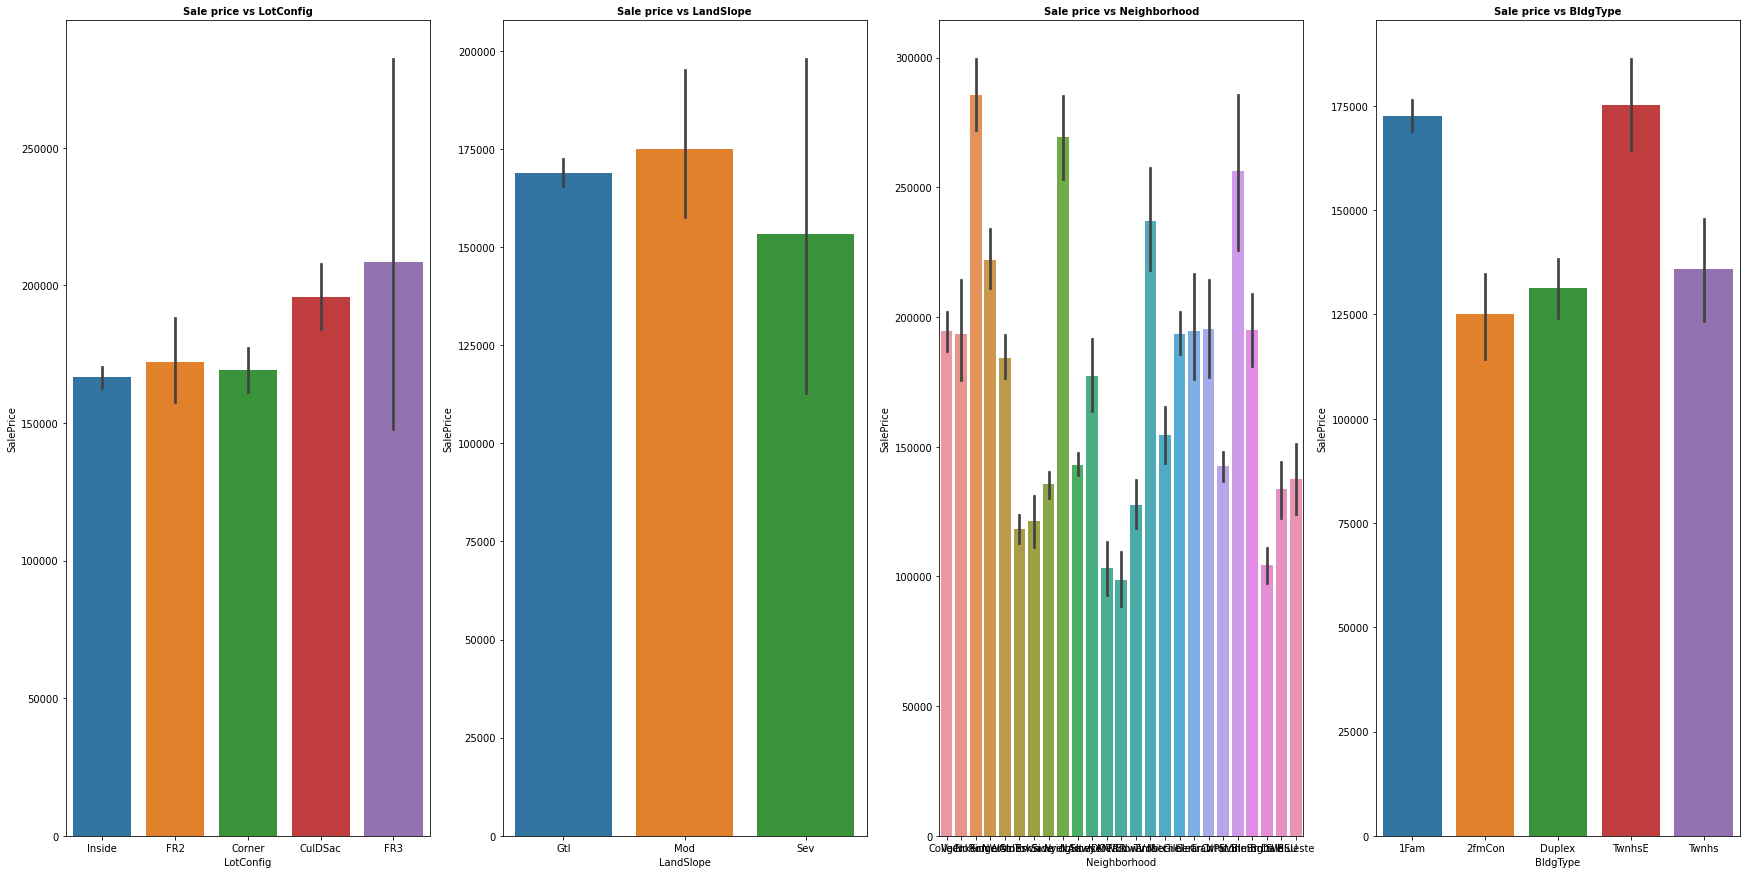

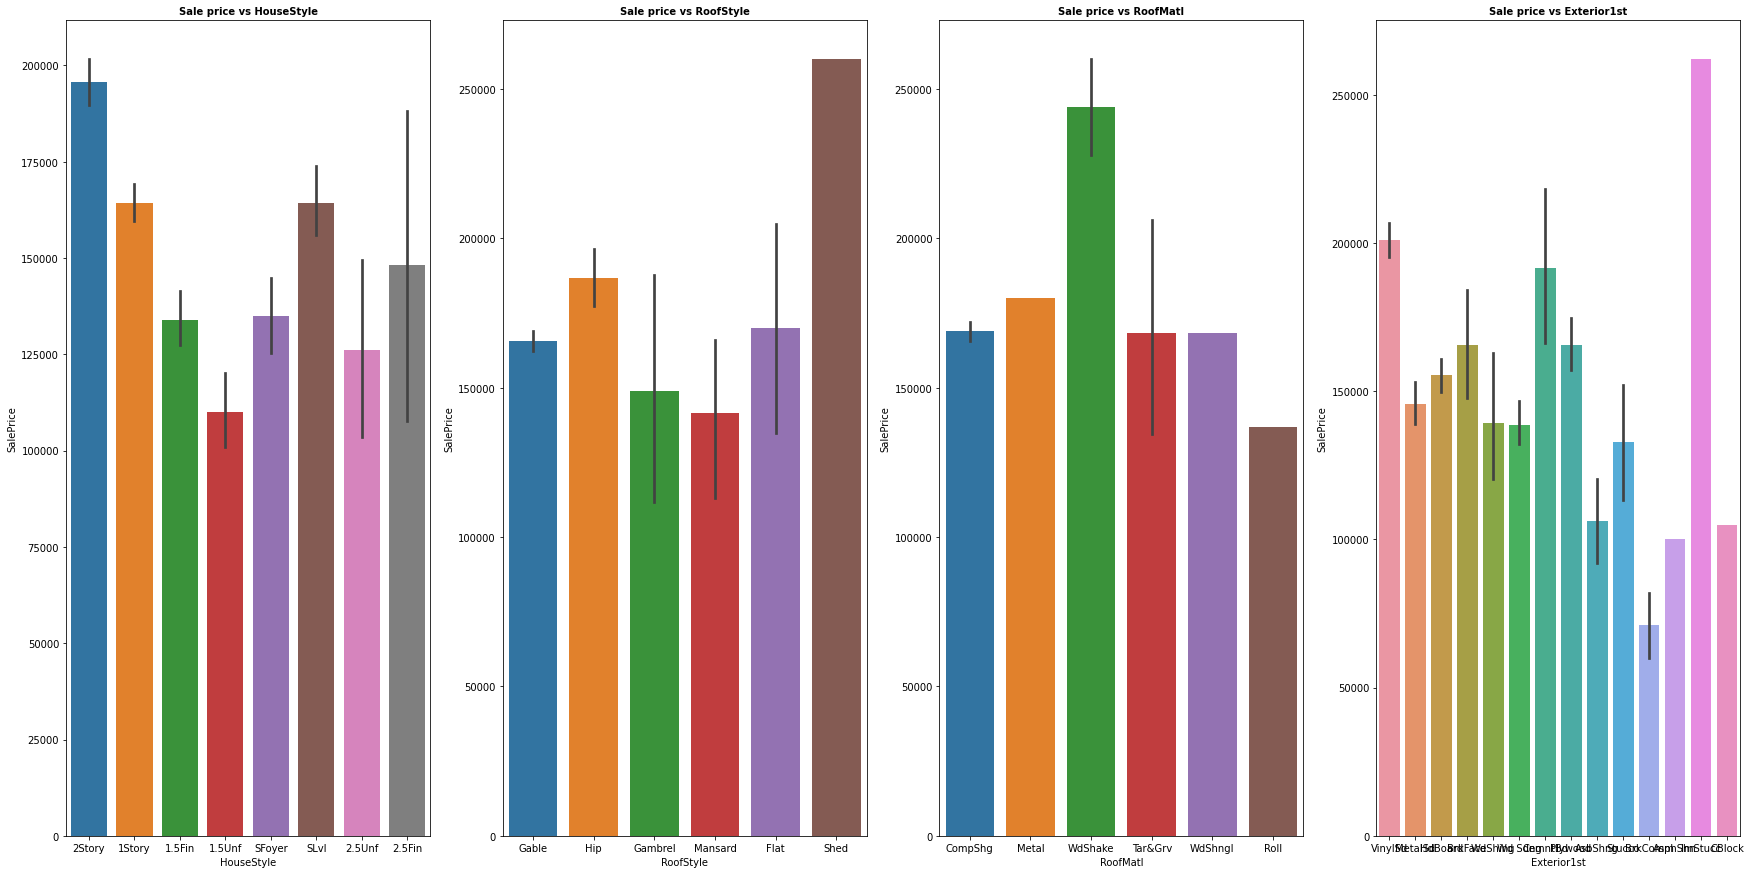

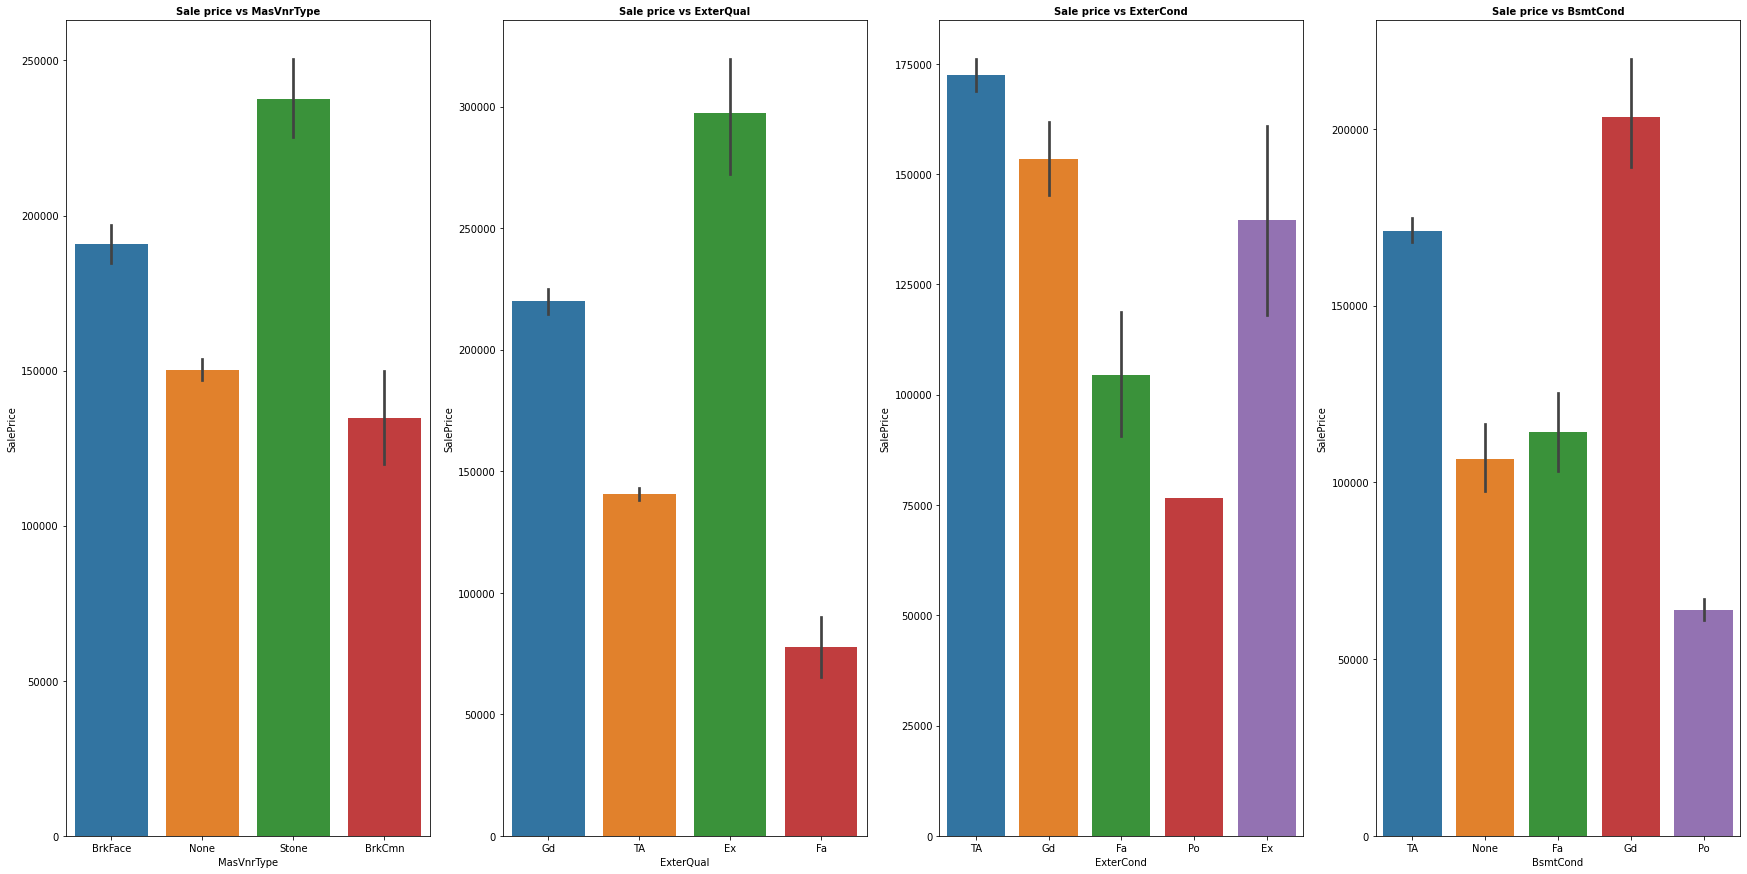

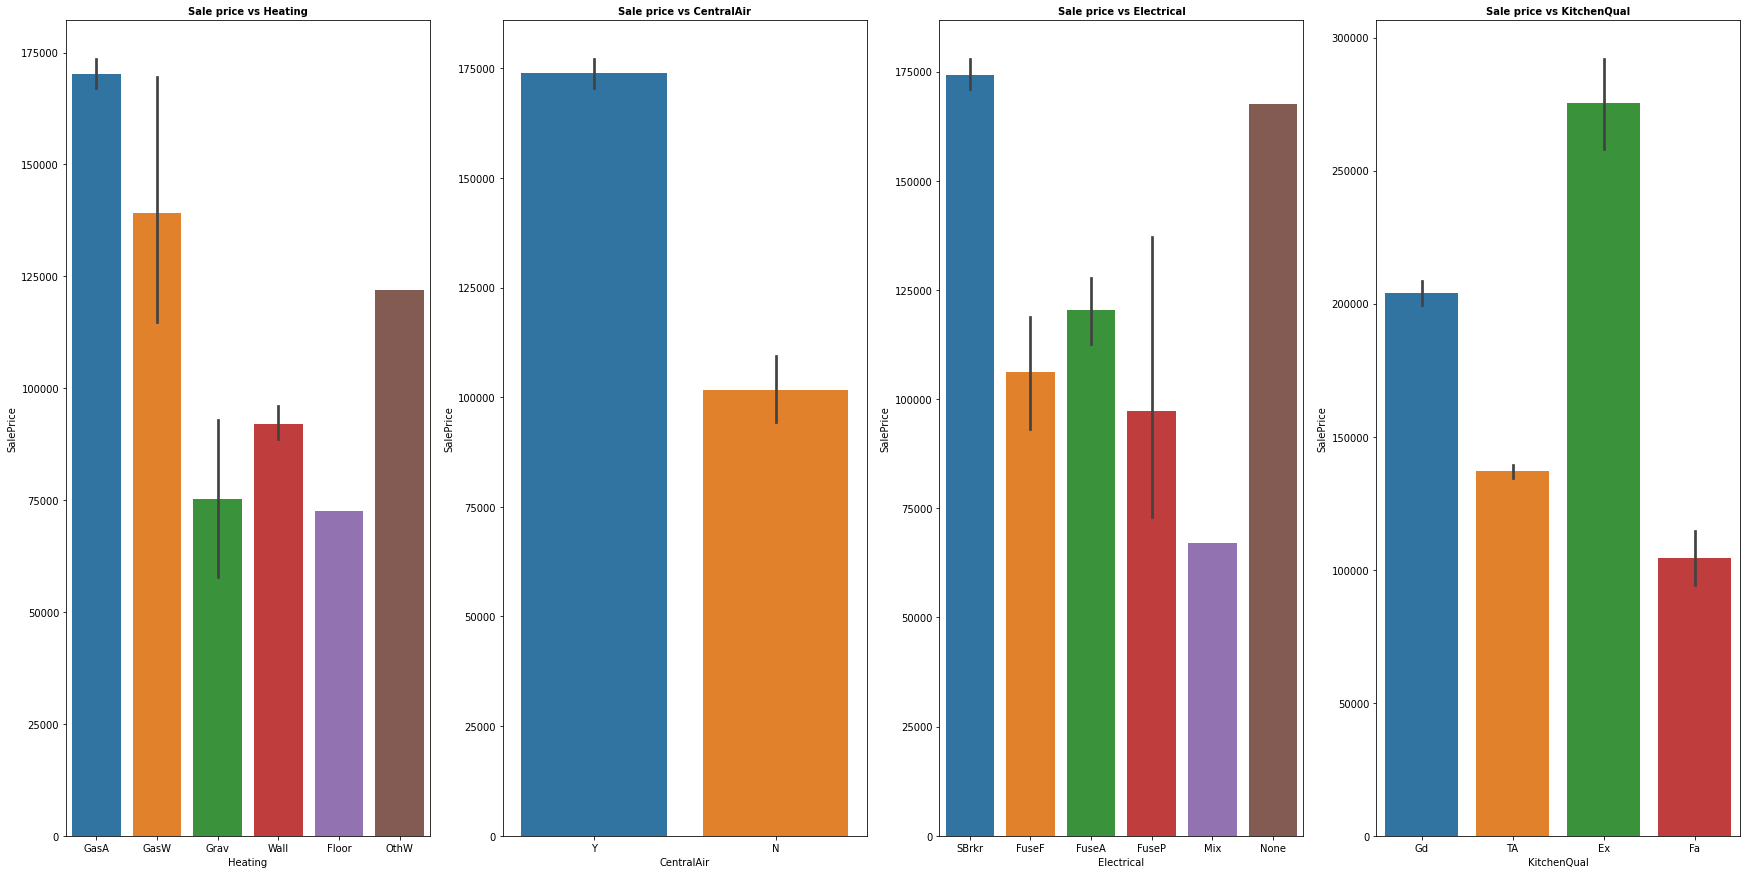

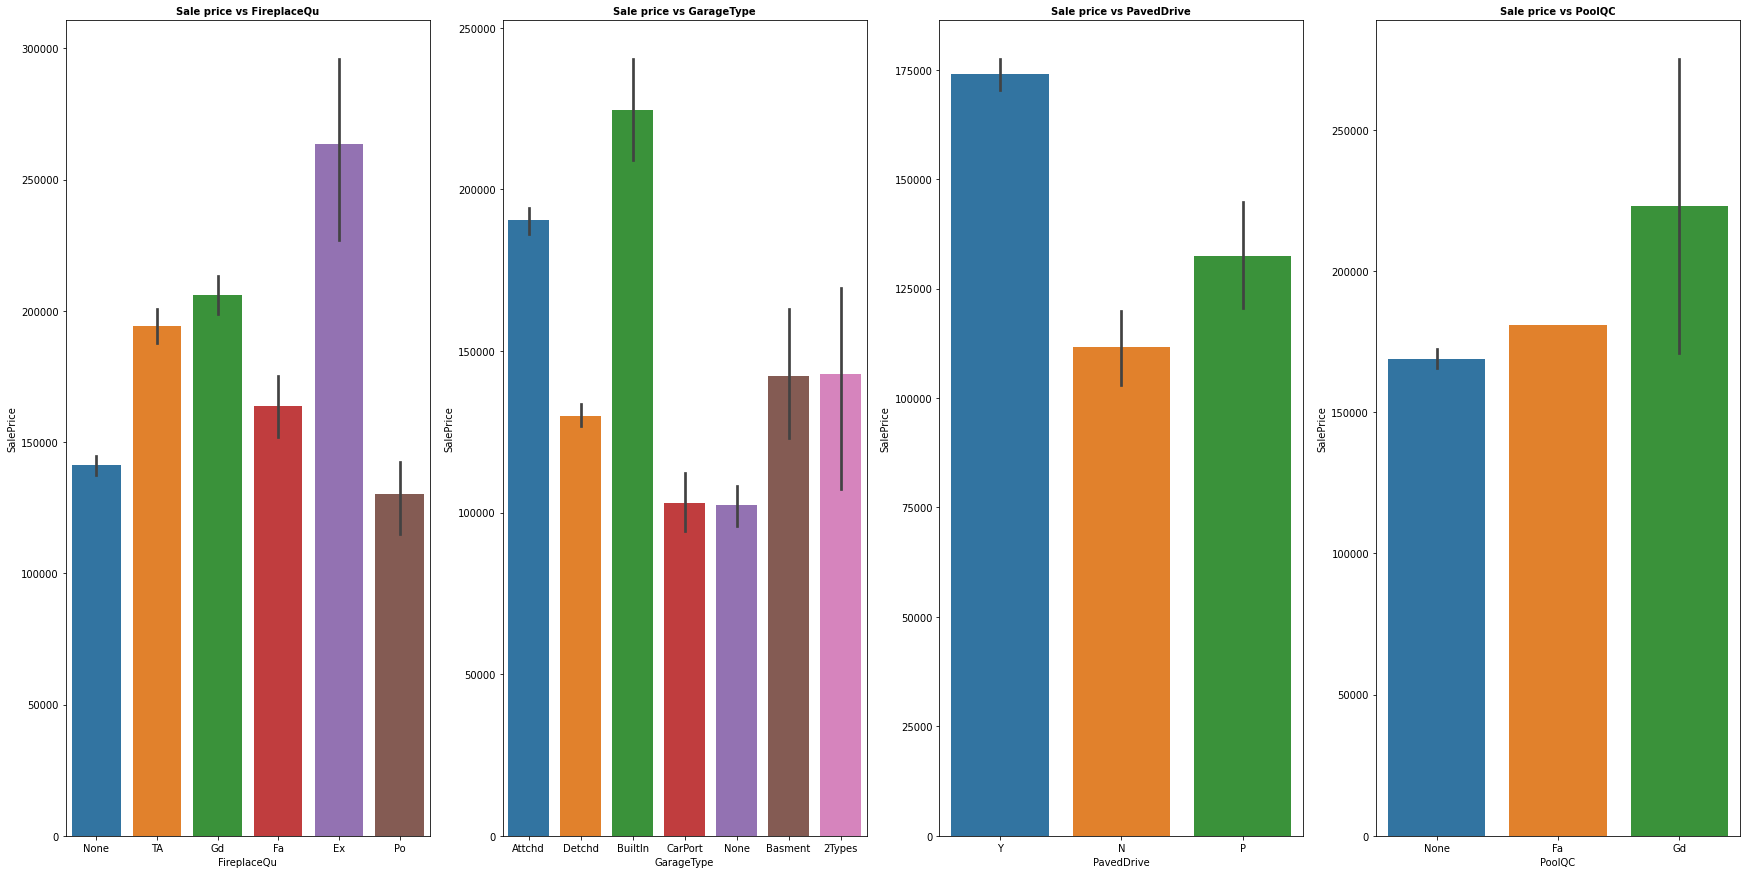

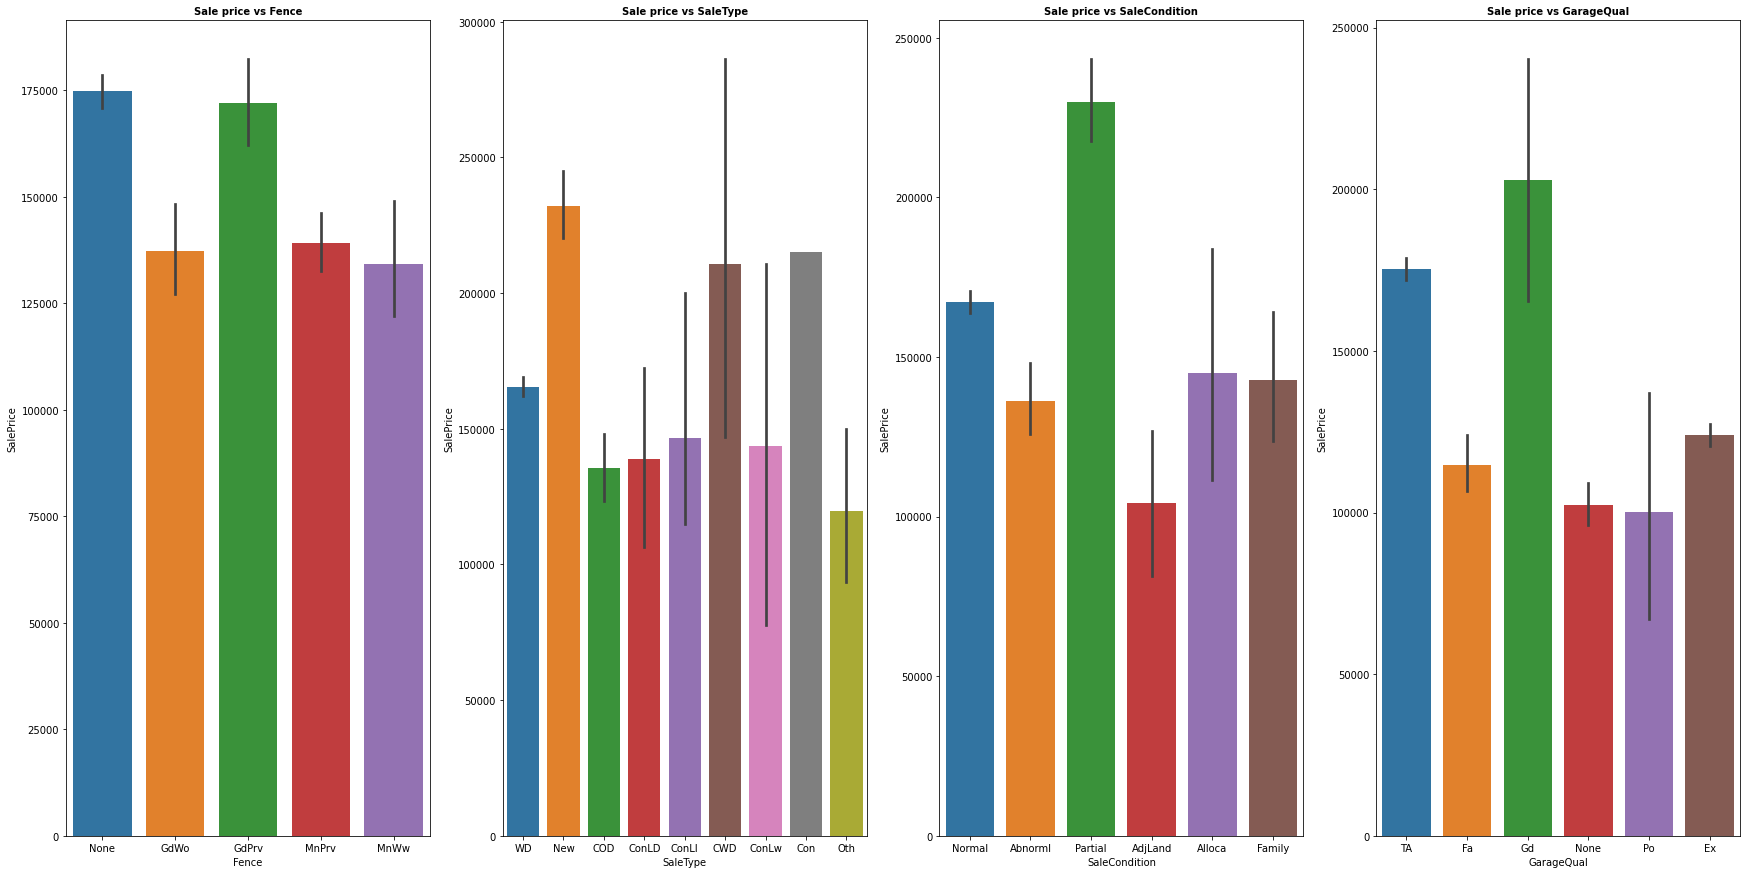

In [162]:
#visualizing of categorical variables using boxplot
# Function for boxplot
def create_boxplt(Fi,Se,Th,Fo):
  plt.figure(figsize=(30, 15))
  
  plt.subplot(1,4,1)
  sns.barplot(x = Fi, y = 'SalePrice', data = housing_df)
  plt.title("Sale price vs "+Fi, fontweight='bold', fontsize=10)
  plt.xlabel(Fi, fontsize=10)
  plt.ylabel('SalePrice', fontsize=10)

  plt.subplot(1,4,2)
  sns.barplot(x = Se, y = 'SalePrice', data = housing_df)
  plt.title("Sale price vs "+Se, fontweight='bold', fontsize=10)
  plt.xlabel(Se, fontsize=10)
  plt.ylabel('SalePrice', fontsize=10)
  
  plt.subplot(1,4,3)
  sns.barplot(x = Th, y = 'SalePrice', data = housing_df)
  plt.title("Sale price vs "+Th, fontweight='bold', fontsize=10)
  plt.xlabel(Th, fontsize=10)
  plt.ylabel('SalePrice', fontsize=10)
  
  plt.subplot(1,4,4)
  sns.barplot(x = Fo, y = 'SalePrice', data = housing_df)
  plt.title("Sale price vs "+Fo, fontweight='bold', fontsize=10)
  plt.xlabel(Fo, fontsize=10)
  plt.ylabel('SalePrice', fontsize=10)
  
  plt.show()


# call fucntion to create plot
create_boxplt('MSZoning','Alley','LotShape','LandContour')
create_boxplt('LotConfig','LandSlope','Neighborhood','BldgType')
create_boxplt('HouseStyle','RoofStyle','RoofMatl','Exterior1st')
create_boxplt('MasVnrType','ExterQual','ExterCond','BsmtCond')
create_boxplt('Heating','CentralAir','Electrical','KitchenQual')
create_boxplt('FireplaceQu','GarageType','PavedDrive','PoolQC')
create_boxplt('Fence','SaleType','SaleCondition','GarageQual')

<font color='Green' size='3'><b>Inference :</b></font> 

1.   Housing with FV - MSZoning have high sale price
2.   Housing with FR3 - Lotshape have high sale price
3.   Housing with Stone - MasVnrType have high sale price
4.   Housing with Paved drive have high sale price


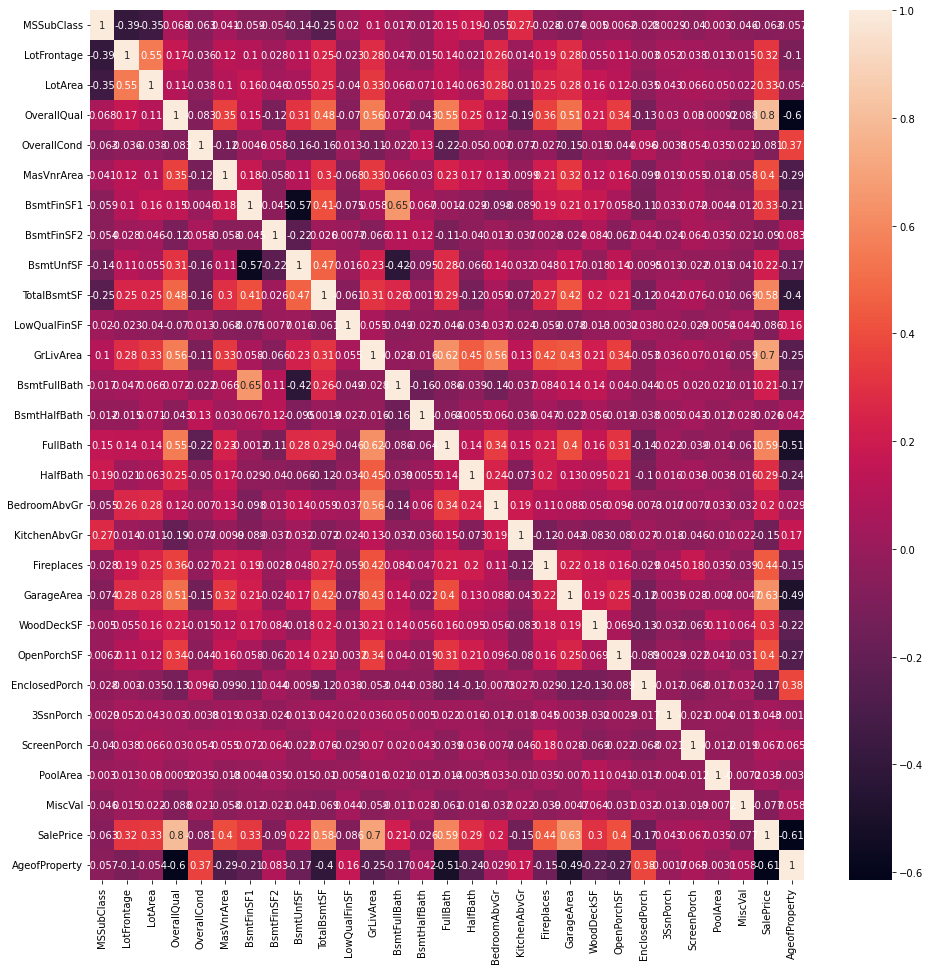

In [163]:
#Plotting a heatmap to understand correlation amongst numeric variables
num_vars = housing_df.select_dtypes(include=['int32','float32','int64','float64']).columns
plt.figure(figsize=(16,16))
sns.heatmap(housing_df[num_vars].corr(),annot=True)
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 

From the above we can infer that:

1.   OverallQual, YearsRemodAdd, TotalBsmtSF, GrLivArea, FullBath, GarageArea have influnce of the Sales Price

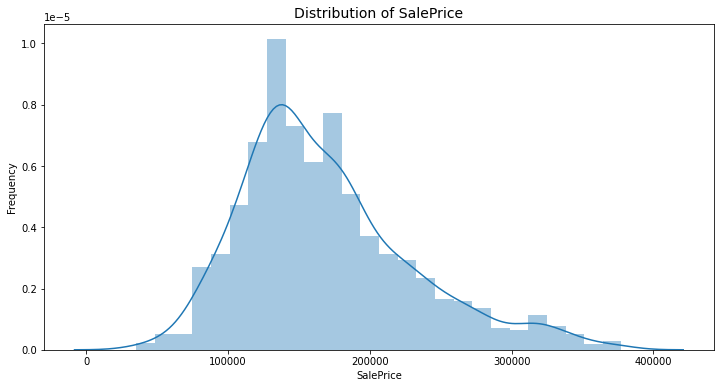

In [164]:
##Visualising the target variable 'SalePrice'

plt.figure(figsize=(12,6))
sns.distplot(housing_df['SalePrice'])
plt.ylabel('Frequency', fontsize=10)
plt.title('Distribution of SalePrice', fontsize=14)
plt.show()

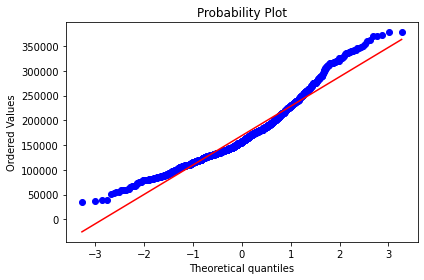

In [165]:
#Also the QQ-plot
plt.subplot(111)
res = stats.probplot(housing_df['SalePrice'],plot=plt)
plt.autoscale()
plt.tight_layout()
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 

It shows the skewness in the data of the target variable and the target variable is non-linear. Hence, transforming the variable using log-transform.

In [166]:
housing_df['SalePrice'] = np.log(housing_df['SalePrice'])

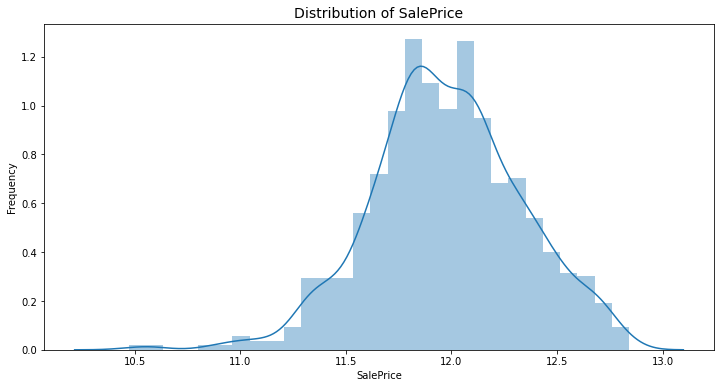

In [167]:
##Visualising the target variable 'SalePrice'

plt.figure(figsize=(12,6))
sns.distplot(housing_df['SalePrice'])
plt.ylabel('Frequency', fontsize=10)
plt.title('Distribution of SalePrice', fontsize=14)
plt.show()

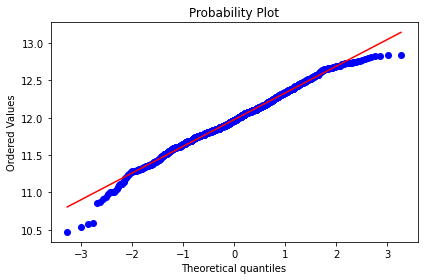

In [168]:
#Also the QQ-plot
plt.subplot(111)
res = stats.probplot(housing_df['SalePrice'],plot=plt)
plt.autoscale()
plt.tight_layout()
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 



*   The distribution plot is alomost normal
*   Points on Probability plot lies in a stratigh line



#<font color='33E8FF' size='5'><b>Data Preparation</b></font>

Now our dataset has many categorical columns.

But in order to fit a regression line, we would need numerical values and not string. Hence, we would convert them to 1s and 0s.

We would create Dummy encoding for Categorical Variables and for Variable which are having order convert to Ordinal



In [169]:
# Check the dataset
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,AgeofProperty
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,3,1,Gd,Typ,0,None,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,WD,Normal,12.247694,5
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,WD,Normal,12.109011,31
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,WD,Normal,12.317167,7
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,WD,Normal,12.429216,8
6,20,RL,75.0,10084,None,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,0,1694,1,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,RFn,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,WD,Normal,12.634603,3


### **Mapping**

In [170]:
# check values
housing_df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape','PoolQC']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape,PoolQC
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,None,RFn,TA,TA,TA,Reg,None
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,TA,RFn,TA,TA,TA,Reg,None
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,TA,RFn,TA,TA,TA,IR1,None
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,TA,RFn,TA,TA,TA,IR1,None
6,Gtl,Gd,Ex,TA,Av,GLQ,Unf,Ex,Y,Gd,Gd,RFn,TA,TA,TA,Reg,None


In [171]:
# converting those variables
housing_df['LandSlope'] = housing_df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['ExterQual'] = housing_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df.BsmtExposure.map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df.BsmtFinType1.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df.BsmtFinType2.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df.CentralAir.map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['FireplaceQu'] = housing_df.FireplaceQu.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageFinish'] = housing_df.GarageFinish.map({'None':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df.GarageQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df.GarageCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['ExterCond'] = housing_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['LotShape'] = housing_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['PoolQC'] = housing_df.PoolQC.map({'None': 0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

In [172]:
# check values
housing_df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape','PoolQC']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape,PoolQC
0,0,3,4,3,1,6,1,4,1,3,0,2,3,3,2,3,0
1,0,2,4,3,4,5,1,4,1,2,3,2,3,3,2,3,0
2,0,3,4,3,2,6,1,4,1,3,3,2,3,3,2,0,0
4,0,3,4,3,3,6,1,4,1,3,3,2,3,3,2,0,0
6,0,3,5,3,3,6,1,4,1,3,4,2,3,3,2,3,0


In [173]:
pd.set_option('max_columns', None)
housing_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,AgeofProperty
0,60,RL,65.0,8450,None,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,0,1710,1,0,2,1,3,1,3,Typ,0,0,Attchd,2,548,3,3,Y,0,61,0,0,0,0,0,None,None,0,WD,Normal,12.247694,5
1,20,RL,80.0,9600,None,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,0,1262,0,1,2,0,3,1,2,Typ,1,3,Attchd,2,460,3,3,Y,298,0,0,0,0,0,0,None,None,0,WD,Normal,12.109011,31
2,60,RL,68.0,11250,None,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,1,SBrkr,0,1786,1,0,2,1,3,1,3,Typ,1,3,Attchd,2,608,3,3,Y,0,42,0,0,0,0,0,None,None,0,WD,Normal,12.317167,7
4,60,RL,84.0,14260,None,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,0,2198,1,0,2,1,4,1,3,Typ,1,3,Attchd,2,836,3,3,Y,192,84,0,0,0,0,0,None,None,0,WD,Normal,12.429216,8
6,20,RL,75.0,10084,None,3,Lvl,Inside,0,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,3,2,PConc,5,3,3,6,1369,1,0,317,1686,GasA,4,1,SBrkr,0,1694,1,0,2,0,3,1,3,Typ,1,4,Attchd,2,636,3,3,Y,255,57,0,0,0,0,0,None,None,0,WD,Normal,12.634603,3
7,60,RL,69.0,10382,None,0,Lvl,Corner,0,NWAmes,PosN,Norm,1Fam,2Story,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,2,2,CBlock,4,3,2,5,859,4,32,216,1107,GasA,4,1,SBrkr,0,2090,1,0,2,1,3,1,2,Typ,2,3,Attchd,2,484,3,3,Y,235,204,228,0,0,0,0,None,Shed,350,WD,Normal,12.206073,36
8,50,RM,51.0,6120,None,3,Lvl,Inside,0,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,Gable,CompShg,BrkFace,Wd Shng,None,0.0,2,2,BrkTil,3,3,1,1,0,1,0,952,952,GasA,3,1,FuseF,0,1774,0,0,2,0,2,2,2,Min1,2,3,Detchd,1,468,2,3,Y,90,0,205,0,0,0,0,None,None,0,WD,Abnorml,11.774520,77
9,190,RL,50.0,7420,None,3,Lvl,Corner,0,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,BrkTil,3,3,1,6,851,1,0,140,991,GasA,4,1,SBrkr,0,1077,1,0,1,0,2,2,2,Typ,2,3,Attchd,2,205,4,3,Y,0,4,0,0,0,0,0,None,None,0,WD,Normal,11.678440,69
10,20,RL,70.0,11200,None,3,Lvl,Inside,0,Sawyer,Norm,Norm,1Fam,1Story,5,5,Hip,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3,3,1,3,906,1,0,134,1040,GasA,4,1,SBrkr,0,1040,1,0,1,0,3,1,2,Typ,0,0,Detchd,1,384,3,3,Y,0,0,0,0,0,0,0,None,None,0,WD,Normal,11.771436,43
11,60,RL,85.0,11924,None,0,Lvl,Inside,0,NridgHt,Norm,Norm,1Fam,2Story,9,5,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,4,2,PConc,5,3,1,6,998,1,0,177,1175,GasA,4,1,SBrkr,0,2324,1,0,3,0,4,1,4,Typ,2,4,BuiltIn,3,736,3,3,Y,147,21,0,0,0,0,0,None,None,0,New,Partial,12.751300,1


### **Dummy Variables**

In [174]:
# Creating dummies for other variables

##'MSZoning'
d_MSZoning = pd.get_dummies(housing_df['MSZoning'], prefix='MSZoning', drop_first = True)
housing_df = pd.concat([housing_df, d_MSZoning], axis = 1)

##'Alley'
d_Alley = pd.get_dummies(housing_df['Alley'], prefix='Alley', drop_first = True)
housing_df = pd.concat([housing_df, d_Alley], axis = 1)

##'LandContour'
d_LandContour= pd.get_dummies(housing_df['LandContour'], prefix='LandContour', drop_first = True)
housing_df = pd.concat([housing_df, d_LandContour], axis = 1)

##'LotConfig'
d_LotConfig= pd.get_dummies(housing_df['LotConfig'], prefix='LotConfig', drop_first = True)
housing_df = pd.concat([housing_df, d_LotConfig], axis = 1)

##Neighborhood
d_Neighborhood = pd.get_dummies(housing_df['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_df = pd.concat([housing_df, d_Neighborhood], axis = 1)

##Condition1
d_Condition1 = pd.get_dummies(housing_df['Condition1'], prefix='Condition1', drop_first = True)
housing_df = pd.concat([housing_df, d_Condition1], axis = 1)

##Condition2
d_Condition2 = pd.get_dummies(housing_df['Condition2'], prefix='Condition2', drop_first = True)
housing_df = pd.concat([housing_df, d_Condition2], axis = 1)

##BldgType
d_BldgType = pd.get_dummies(housing_df['BldgType'], prefix='BldgType', drop_first = True)
housing_df = pd.concat([housing_df, d_BldgType], axis = 1)

##HouseStyle
d_HouseStyle = pd.get_dummies(housing_df['HouseStyle'], prefix='HouseStyle', drop_first = True)
housing_df = pd.concat([housing_df, d_HouseStyle], axis = 1)

##RoofStyle
d_RoofStyle= pd.get_dummies(housing_df['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_df = pd.concat([housing_df, d_RoofStyle], axis = 1)

##RoofMatl
d_RoofMatl= pd.get_dummies(housing_df['RoofMatl'], prefix='RoofMatl', drop_first = True)
housing_df = pd.concat([housing_df, d_RoofMatl], axis = 1)

##Exterior1st
d_Exterior1st = pd.get_dummies(housing_df['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_df = pd.concat([housing_df, d_Exterior1st], axis = 1)

##Exterior2nd
d_Exterior2nd = pd.get_dummies(housing_df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_df = pd.concat([housing_df, d_Exterior2nd], axis = 1)

##MasVnrType
d_MasVnrType = pd.get_dummies(housing_df['MasVnrType'], prefix='MasVnrType', drop_first = True)
housing_df = pd.concat([housing_df, d_MasVnrType], axis = 1)

##Foundation
d_Foundation = pd.get_dummies(housing_df['Foundation'], prefix='Foundation', drop_first = True)
housing_df = pd.concat([housing_df, d_Foundation], axis = 1)

##Heating
d_Heating = pd.get_dummies(housing_df['Heating'], prefix='Heating', drop_first = True)
housing_df = pd.concat([housing_df, d_Heating], axis = 1)

##Electrical
d_Electrical = pd.get_dummies(housing_df['Electrical'], prefix='Electrical', drop_first = True)
housing_df = pd.concat([housing_df, d_Electrical], axis = 1)

##Functional
d_Functional = pd.get_dummies(housing_df['Functional'], prefix='Functional', drop_first = True)
housing_df = pd.concat([housing_df, d_Functional], axis = 1)

##GarageType
d_GarageType = pd.get_dummies(housing_df['GarageType'], prefix='GarageType', drop_first = True)
housing_df = pd.concat([housing_df, d_GarageType], axis = 1)

##PavedDrive
d_PavedDrive = pd.get_dummies(housing_df['PavedDrive'], prefix='PavedDrive', drop_first = True)
housing_df = pd.concat([housing_df, d_PavedDrive], axis = 1)

##Fence
d_Fence = pd.get_dummies(housing_df['Fence'], prefix='Fence', drop_first = True)
housing_df = pd.concat([housing_df, d_Fence], axis = 1)

##MiscFeature
d_MiscFeature = pd.get_dummies(housing_df['MiscFeature'], prefix='MiscFeature', drop_first = True)
housing_df = pd.concat([housing_df, d_MiscFeature], axis = 1)

##SaleType
d_SaleType = pd.get_dummies(housing_df['SaleType'], prefix='SaleType', drop_first = True)
housing_df = pd.concat([housing_df, d_SaleType], axis = 1)

##SaleCondition
d_SaleCondition = pd.get_dummies(housing_df['SaleCondition'], prefix='SaleCondition', drop_first = True)
housing_df = pd.concat([housing_df, d_SaleCondition], axis = 1)


In [175]:
housing_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,AgeofProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,None,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,0,1710,1,0,2,1,3,1,3,Typ,0,0,Attchd,2,548,3,3,Y,0,61,0,0,0,0,0,None,None,0,WD,Normal,12.247694,5,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,None,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,

In [176]:
##Dropping columns for which we have created dummies, as we now have new columns derived from these columns
before_dummy_cols = ['Alley','MSZoning', 'LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']
housing_df = housing_df.drop(before_dummy_cols, axis=1)

In [177]:
housing_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,AgeofProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,0,1710,1,0,2,1,3,1,3,0,0,2,548,3,3,0,61,0,0,0,0,0,0,12.247694,5,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,0,1262,0,1,2,0,3,1,2,1,3,2,460,3,3,298,0,0,0,0,0,0,0,12.109011,31,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,0,1786

In [178]:
#check the shape 
housing_df.shape

(1289, 195)

In [179]:
# data info
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1459
Columns: 195 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(43), uint8(149)
memory usage: 693.2 KB


#<font color='33E8FF' size='5'><b>Splitting the Data into Training and Testing Sets</b></font>

Here we will perform the following:

1.   Splitting the data set into Training and Testing Set
2.   Scaling the data set

In [180]:
#import the library
from sklearn.model_selection import train_test_split

In [181]:
# Splittomg train and test data sets, 70% training and 30% for testing the model
df_train, df_test = train_test_split(housing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [182]:
# check the data frame for training and testing
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,AgeofProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
999,20,64.0,6762,3,0,7,5,24.0,3,2,4,3,3,6,686,1,0,501,1187,4,1,0,1208,1,0,2,0,2,1,3,0,0,2,632,3,3,105,61,0,0,0,0,0,0,12.235631,4,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
720,120,69.0,6563,0,1,8,5,0.0,3,2,4,3,4,6,1148,1,0,594,1742,2,1,0,1742,1,0,2,0,2,1,3,1,3,2,564,3,3,114,28,234,0,0,0,0,0,12.524526,21,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
186,80,69.0,9947,0,0,7,5,0.0,2,2,4,3,3,6,611,1,0,577,1188

In [183]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,AgeofProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,20,60.0,9000,3,0,4,6,0.0,2,2,3,3,1,5,616,1,0,248,864,2,1,0,864,0,0,1,0,3,1,2,0,0,1,528,3,3,0,0,0,0,0,0,0,0,11.699405,36,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
351,120,69.0,5271,0,1,7,5,0.0,2,2,4,3,4,6,1082,1,0,371,1453,3,1,0,1453,1,0,1,1,2,1,3,1,3,2,445,3,3,0,80,0,0,184,0,0,0,12.154779,20,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
32,20,85.0,11049,3,0,8,5,0.0,3,2,5,3,3,1,0,1,0,1234,1234,4,1,0,

### **Scaling**

Here we can see that few columns have small integer values and others have large values. So we need to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 

For this we will use **StandardScaler** scaling

In [184]:
#import the library
from sklearn.preprocessing import StandardScaler

In [185]:
#instantiate
scaler = StandardScaler()

In [186]:
#applying to all variable except dummy and 0-1 variables
num_col = ['MSSubClass','LotFrontage','LotArea','LotShape','LandSlope','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
           'BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','KitchenQual','Fireplaces','FireplaceQu','GarageFinish','GarageArea','GarageQual',
           'GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC',
           'MiscVal','SalePrice','AgeofProperty']
#           
# scaling the collumns in the train data set using fit_transform.
df_train[num_col] = scaler.fit_transform(df_train[num_col])

In [187]:
#scaling on test data
df_test[num_col] = scaler.transform(df_test[num_col])

In [188]:
# check the data frame for training
print(df_train.shape)
# check the data frame for training
df_train.head()

(902, 195)


,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,AgeofProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
999,-0.878532,-0.229496,-0.673567,0.722666,-0.218616,0.781796,-0.516152,-0.443377,1.186206,-0.219679,0.640866,0.118964,1.396190,1.184455,0.712437,-0.268712,-0.299472,-0.145781,0.484186,0.902760,1,-0.114306,-0.544641,1.162392,-0.237823,0.876235,-0.732894,-1.07560,-0.208952,0.876416,-0.903018,-0.942523,0.342591,0.847459,0.269087,0.270419,0.132541,0.371159,-0.366917,-0.100843,-0.251097,-0.033315,-0.033315,-0.163795,0.709989,-1.099449,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
720,1.473956,0.005470,-0.724749,-1.426272,3.889541,1.547464,-0.516152,-0.610512,1.186206,-0.219679,0.640866,0.118964,2.368672,1.184455,1.878296,-0.268712,-0.299472,0.071689,1.975092,

In [189]:
# check the data frame for testing
print(df_test.shape)
# check the data frame for testing
df_test.head()

(387, 195)


,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,AgeofProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.878532,-0.417470,-0.097963,0.722666,-0.218616,-1.515208,0.375743,-0.610512,-0.658549,-0.219679,-0.515256,0.118964,-0.548773,0.711093,0.535792,-0.268712,-0.299472,-0.737393,-0.383494,-1.161345,1,-0.114306,-1.329431,-0.808431,-0.237823,-1.014588,-0.732894,0.19929,-0.208952,-0.704639,-0.903018,-0.942523,-0.777036,0.339131,0.269087,0.270419,-0.743024,-0.758997,-0.366917,-0.100843,-0.251097,-0.033315,-0.033315,-0.163795,-0.756275,-0.030408,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
351,1.473956,0.005470,-1.057046,-1.426272,3.889541,0.781796,-0.516152,-0.610512,-0.658549,-0.219679,0.640866,0.118964,2.368672,1.184455,1.711745,-0.268712,-0.299472,-0.44

### **Dividing into X & Y datasets for model building**

In [190]:
#Training set
y_train = df_train.pop('SalePrice')
X_train = df_train

In [191]:
#Testing Set
y_test = df_test.pop('SalePrice')
X_test = df_test

#<font color='33E8FF' size='5'><b>Building the model</b></font>

We have the opotion to build model using statsmodel or Linear Regression RFE automated method. As the no. of variable in dataset are very large we will use the RFE.

In [192]:
# import the library
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [193]:
#instantiate
lm = LinearRegression()

In [194]:
#RFE inistantiation
rfe = RFE(lm,step=50)

In [195]:
# fit the rfe
rfe = rfe.fit(X_train,y_train)


In [196]:
#Zipping into list the columns, supported columns and reank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 2),
 ('LotFrontage', False, 3),
 ('LotArea', True, 1),
 ('LotShape', False, 3),
 ('LandSlope', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 3),
 ('ExterQual', False, 3),
 ('ExterCond', False, 3),
 ('BsmtQual', False, 3),
 ('BsmtCond', False, 3),
 ('BsmtExposure', False, 3),
 ('BsmtFinType1', False, 3),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 2),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 3),
 ('CentralAir', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 3),
 ('KitchenQual', False, 3),
 ('Fireplaces', False, 2),
 ('FireplaceQu', False, 3),
 ('GarageFinish', False, 3),
 ('GarageArea', False, 2),
 ('GarageQual', False, 2),
 ('GarageCond', False, 3),
 ('WoodDeckSF', False, 3),
 ('Op

In [197]:
# extracting rfe supported columns
rfe_cols = df_train.columns[rfe.support_]
rfe_cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', 'GrLivArea', 'PoolArea',
       'PoolQC', 'AgeofProperty', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_SFoyer', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exter

Lets filter the train and test set for the RFE selected column

In [198]:
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]

## <font color='33E8FF' size='5'><b>Linear Regression</b></font>


In [199]:
# step 1 create an object
lm = LinearRegression()

In [200]:
# step 2 fit the model
lm.fit(X_train_rfe,y_train)

LinearRegression()

In [201]:
# printing the co-efficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.6933798673676279
[ 1.19729993e-01  1.67645087e-01  1.41834498e-01  1.73768705e+13
  5.81842820e+12  1.87525039e+13 -1.63237000e+13  1.08389517e-02
  3.80221689e-01  6.52183314e+12 -6.52183314e+12 -2.48021562e-01
  8.86035427e-01  8.23948128e-01  7.46764600e-01  6.16402332e-01
 -4.35368479e-01  5.73612148e-01  1.86358132e-01  4.36924240e-01
 -9.76870546e-02 -5.85879178e-01  7.00915458e-02  2.68663096e-01
  1.00528344e-01  2.15980467e-01 -3.50291766e-03  1.41069806e-01
  5.39645228e-01  3.55415405e-02  4.13987150e-01  3.03774611e-01
 -1.17306710e-01  1.86388984e+11 -3.17382812e-02 -5.01953125e-01
  4.94262695e-01 -4.03320312e-01  8.59375000e-02 -1.53906250e+00
 -1.72436523e+00 -1.50390625e+00 -1.64468384e+00 -1.45263672e+00
 -1.27429199e+00 -1.29699707e-01 -1.13964844e+00 -3.83715672e+10
  1.37728116e+10 -8.14697266e-01  5.81918575e+11 -1.28173828e-01
  5.81054688e-02 -4.33593750e-01 -4.04357910e-03 -1.37728116e+10
  2.76367188e-01 -5.81918575e+11  2.28515625e-01 -2.10449219e-01
  4.1

In [202]:
##Making predictions for train and test sets: linear Model
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

##R2 score for Ridge 
r2_score_linear_train = r2_score(y_true= y_train, y_pred= y_pred_train)
r2_score_linear_test = r2_score(y_true= y_test, y_pred= y_pred_test)

##Check the mean squared error (MSE) for Ridge 
MSE_linear_train = mean_squared_error(y_train, y_pred_train)
MSE_linear_test = mean_squared_error(y_test, y_pred_test)

##Root Mean Squared Error for Train and Test Sets
RMSE_linear_train = np.sqrt(MSE_linear_train)
RMSE_linear_test = np.sqrt(MSE_linear_test)


print("For Linear Regression Model:\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_linear_train,"\nMSE score:",MSE_linear_train,
     "\nRMSE score:",RMSE_linear_train)
print("\nFor Test Set:\nR2 score:",r2_score_linear_test,"\nMSE score:",MSE_linear_test,
      "\nRMSE score:",RMSE_linear_test,"\n","*"*40)

For Linear Regression Model:
 ****************************************

For Train Set:
R2 score: 0.889674482366853 
MSE score: 0.11032551763314699 
RMSE score: 0.33215285281500595

For Test Set:
R2 score: -9.055851659896708e+26 
MSE score: 7.860871380024711e+26 
RMSE score: 28037245549491.324 
 ****************************************


We can view there is big diffrence between R2 values for Train and Test which depicts there is an Overfitting.

Lets regularize the model and deal with overfitting using Ridge and Lasso regression

## <font color='33E8FF' size='5'><b>Ridge Regression</b></font>


In [203]:
## list of alphas/lambda parameter: Ridge Regression 

params = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,20, 50, 100 ]}

ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [204]:
# betst hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 3.0}


In [205]:
##Building model with alpha and Checking the coefficient values with lambda (alpha) = 3

ridge = Ridge(alpha=3.0)
ridge.fit(X_train_rfe, y_train)

print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -1.3443842049079668
Coefficients:
 [ 1.15450592e-01  2.13664938e-01  1.54303038e-01  1.11579739e-01
  2.34830090e-02 -2.44191701e-03  1.24343674e-01  2.24447616e-01
  3.65673743e-01  3.46656457e-03  3.46656457e-03 -2.35218715e-01
  4.58110461e-01  2.17662105e-01  3.54669050e-01  1.77463584e-01
 -1.14581180e-01 -1.40622340e-02  1.95540635e-01  3.32491716e-01
 -7.95275187e-02 -2.55489734e-01  1.69437849e-01  8.55577466e-02
  1.47901546e-01  7.64967902e-02  6.81293331e-02  1.57563119e-01
  1.58597735e-01  4.04575170e-02  2.09744321e-01  3.24566887e-02
  5.42353804e-02  0.00000000e+00  2.04796459e-02 -2.05600543e-01
  7.44218009e-02 -1.74102279e-01  7.52465642e-02  2.18434521e-02
 -9.85899043e-02  2.96684536e-02  7.84001126e-02  2.16547971e-02
  9.07247591e-02 -2.77130351e-02 -3.97557056e-02  0.00000000e+00
 -1.83138004e-04  8.48168233e-02 -4.63581455e-02  9.99962394e-03
  3.63825749e-02 -1.16078098e-01  6.18270308e-02 -1.83138004e-04
  9.01514263e-02 -4.63581455e-02  2.7326759

In [206]:
##Making predictions for train and test sets: Ridge Model
y_pred_train_r = ridge.predict(X_train_rfe)
y_pred_test_r = ridge.predict(X_test_rfe)

##R2 score for Ridge 
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge 
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (alpha=3.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (alpha=3.0):
 ****************************************

For Train Set:
R2 score: 0.9146333125386124 
MSE score: 0.08536668746138759 
RMSE score: 0.29217578178450654

For Test Set:
R2 score: 0.900344689565368 
MSE score: 0.08650512476172913 
RMSE score: 0.2941175356243302 
 ****************************************


In [207]:
# creating an data fram for co-efficients
ridge_df = pd.DataFrame({'Feature':X_train_rfe.columns,'Coeffecient':ridge.coef_.round(4),
                         'Abs. of Co-efficient':abs(ridge.coef_.round(4))})
ridge_df = ridge_df.sort_values(by='Abs. of Co-efficient',ascending=False) 
ridge_df.reset_index(drop=True, inplace=True)  
#head values 
ridge_df.head(10)

,Feature,Coeffecient,Abs. of Co-efficient
0,MSZoning_FV,0.4581,0.4581
1,GrLivArea,0.3657,0.3657
2,MSZoning_RL,0.3547,0.3547
3,Neighborhood_Crawfor,0.3325,0.3325
4,Neighborhood_MeadowV,-0.2555,0.2555
5,Functional_Sev,-0.2489,0.2489
6,AgeofProperty,-0.2352,0.2352
7,CentralAir,0.2244,0.2244
8,SaleCondition_Partial,0.2229,0.2229
9,MSZoning_RH,0.2177,0.2177


### <font color='33E8FF' size='5'><b>Residual Analysis</b></font>

We will now validate the assumptions of residual analysis:



*   error terms are normally distributed
*   error terms are independent of each other

#### Training Set

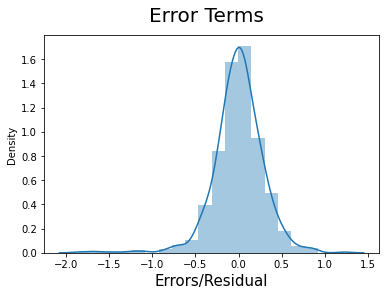

In [208]:
# residual/error terms
res_train_r = y_train - y_pred_train_r

# plotting the distribution of error terms
fig = plt.figure()
sns.distplot(res_train_r, bins = 20)
plt.xlabel('Errors/Residual',fontsize=15)
fig.suptitle('Error Terms',fontsize=20)
plt.show()

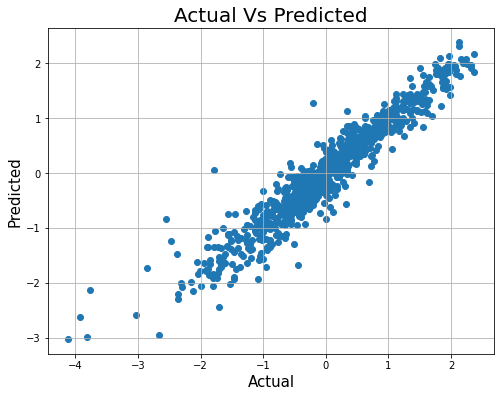

In [209]:
# plotting to validate Linear regression between predicted and actual values
fig = plt.figure(figsize=(8,6))
plt.scatter(y_train,y_pred_train_r)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual Vs Predicted',fontsize=20)
plt.grid(True)
plt.show()

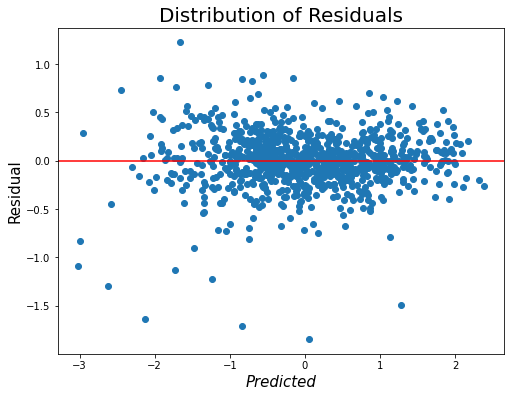

In [210]:
# Scatter plot for predicted values on X - asix and residuals on Y - axis
plt.figure(figsize = (8,6))
plt.scatter(y_pred_train_r,res_train_r)
plt.axhline(y=0,color='r')
plt.title('Distribution of Residuals', fontsize=20)              
plt.xlabel('Predicted', fontstyle='italic', fontsize=15)                      
plt.ylabel('Residual', fontsize=15) 
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 

We can conclude that for training 

*   Residuals are normally distributed with mean 0, so assumptions holds
*   There is Linear regression between predicted and actual
*   Residuals are randomly spread along the 0 line and does not follow any pattern



#### Testing Set

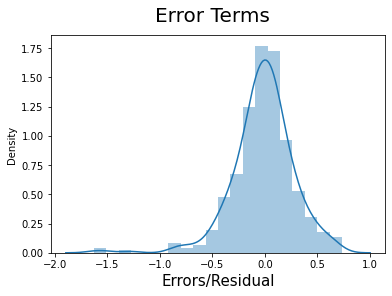

In [211]:
# residual/error terms
res_test_r = y_test - y_pred_test_r

# plotting the distribution of error terms
fig = plt.figure()
sns.distplot(res_test_r, bins = 20)
plt.xlabel('Errors/Residual',fontsize=15)
fig.suptitle('Error Terms',fontsize=20)
plt.show()

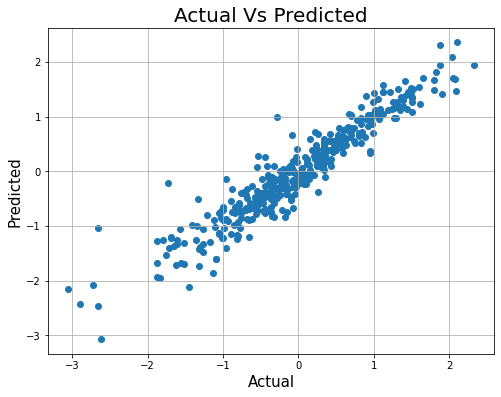

In [212]:
# plotting to validate Linear regression between predicted and actual values
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_test_r)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual Vs Predicted',fontsize=20)
plt.grid(True)
plt.show()

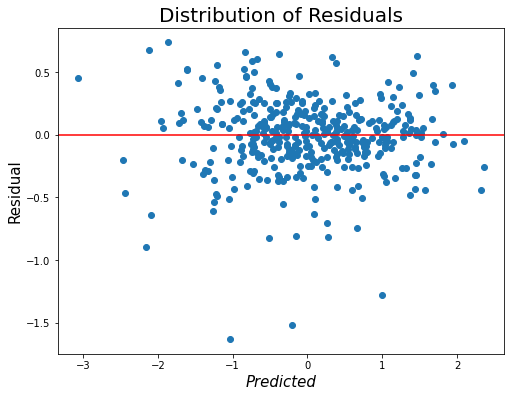

In [213]:
# Scatter plot for predicted values on X - asix and residuals on Y - axis
plt.figure(figsize = (8,6))
plt.scatter(y_pred_test_r,res_test_r)
plt.axhline(y=0,color='r')
plt.title('Distribution of Residuals', fontsize=20)              
plt.xlabel('Predicted', fontstyle='italic', fontsize=15)                      
plt.ylabel('Residual', fontsize=15) 
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 

We can conclude that for testing set

*   Residuals are normally distributed with mean 0, so assumptions holds
*   There is Linear regression between predicted and actual
*   Residuals are randomly spread along the 0 line and does not follow any pattern

## <font color='33E8FF' size='5'><b>Lasso Regression</b></font>


In [214]:
## list of alphas/lambda parameter: Lasso Regression 

params = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,20, 50, 100 ]}

lasso = Lasso()

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)         
#   
lasso_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [215]:
# betst hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.001}


In [216]:
##Display the results
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011739,0.000792,0.004537,0.000836,0.001,{'alpha': 0.001},-0.204746,-0.245484,-0.238039,-0.228936,-0.237606,-0.230962,0.014118,1,-0.216516,-0.209131,-0.207529,-0.209578,-0.207244,-0.210000,0.003379
1,0.007629,0.000315,0.003870,0.000178,0.01,{'alpha': 0.01},-0.237040,-0.269883,-0.237092,-0.244819,-0.258901,-0.249547,0.012922,2,-0.246681,-0.238074,-0.244470,-0.241230,-0.237824,-0.241656,0.003489
2,0.007175,0.000076,0.003805,0.000037,0.1,{'alpha': 0.1},-0.283093,-0.343399,-0.286664,-0.286099,-0.314141,-0.302679,0.023257,3,-0.297622,-0.293461,-0.301547,-0.297104,-0.298183,-0.297584,0.002581
3,0.007828,0.001533,0.003826,0.000142,0.2,{'alpha': 0.2},-0.346124,-0.404961,-0.380684,-0.363208,-0.394521,-0.377900,0.021175,4,-0.376663,-0.366844,-0.382563,-0.371253,-0.371315,-0.373728,0.005404
4,0.007759,0.001119,0.005555,0.002125,0.3,{'alpha': 0.3},-0.404137,-0.479115,-0.469622,-0.423237,-0.463413,-0.447905,0.029018,5,-0.446570,-0.438367,-0.451064,-0.442222,-0.440469,-0.443739,0.004550
5,0.007507,0.000749,0.003893,0.000146,0.4,{'alpha': 0.4},-0.476906,-0.561985,-0.555825,-0.495053,-0.544683,-0.526890,0.034344,6,-0.525953,-0.520641,-0.524023,-0.523260,-0.523124,-0.523400,0.001709
6,0.006934,0.000140,0.003788,0.000054,0.5,{'alpha': 0.5},-0.530145,-0.634923,-0.622297,-0.550014,-0.621067,-0.591689,0.042880,7,-0.587161,-0.591326,-0.584780,-0.589528,-0.595958,-0.589750,0.003807
7,0.007396,0.000746,0.004106,0.000438,0.6,{'alpha': 0.6},-0.581922,-0.707705,-0.675808,-0.617563,-0.684090,-0.653418,0.046447,8,-0.645773,-0.656245,-0.642978,-0.660467,-0.654510,-0.651995,0.006575
8,0.007279,0.000775,0.004958,0.002348,0.7,{'alpha': 0.7},-0.635231,-0.781500,-0.732781,-0.683538,-0.750822,-0.716775,0.051689,9,-0.706204,-0.720619,-0.706332,-0.726571,-0.717139,-0.715373,0.008023
9,0.006841,0.000226,0.003774,0.000073,0.8,{'alpha': 0.8},-0.692762,-0.839589,-0.793085,-0.754367,-0.816180,-0.779197,0.051566,10,-0.769862,-0.772613,-0.773137,-0.794133,-0.778331,-0.777615,0.008701


In [217]:
##Checking the coefficient values with lambda (alpha) = 0.001

lasso = Lasso(alpha=0.001)
lasso.fit(X_train_rfe, y_train)

print("Intercept: ", lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercept:  -0.9637381780515563
Coefficients:
 [ 1.07658019e-01  2.23846705e-01  1.57819612e-01  1.17775218e-01
  2.14696171e-02 -0.00000000e+00  1.21802235e-01  2.01198504e-01
  3.63175996e-01  6.24641932e-03  1.04006481e-16 -2.34801377e-01
  4.37976974e-01  1.78254461e-01  3.25427178e-01  1.31238078e-01
 -7.92278379e-02  0.00000000e+00  1.84069627e-01  3.28182129e-01
 -4.62422697e-02 -1.98958257e-01  1.55011351e-01  7.07684469e-03
  9.74460936e-02  0.00000000e+00  2.03993849e-02  1.25650945e-01
  7.96344390e-02  0.00000000e+00  8.58142435e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.70922975e-01
  0.00000000e+00 -0.00000000e+00  4.57444661e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.95098872e-02 -6.20206184e-02  1.92572702e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.0000000

In [218]:
##Making predictions for train and test sets: Laso Model
y_pred_train_l = lasso.predict(X_train_rfe)
y_pred_test_l = lasso.predict(X_test_rfe)

##R2 score for Ridge 
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Ridge 
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)


print("For Lassp Regression Model (alpha=0.001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lassp Regression Model (alpha=0.001):
 ****************************************

For Train Set:
R2 score: 0.9097180649311687 
MSE score: 0.09028193506883135 
RMSE score: 0.30046952435951196

For Test Set:
R2 score: 0.9003168898100629 
MSE score: 0.08652925615312744 
RMSE score: 0.2941585561446878 
 ****************************************


In [219]:
# creating an data fram for co-efficients
lasso_df = pd.DataFrame({'Feature':X_train_rfe.columns,'Coeffecient':lasso.coef_.round(4),
                         'Abs. of Co-efficient':abs(lasso.coef_.round(4))})
lasso_df = lasso_df.sort_values(by='Abs. of Co-efficient',ascending=False) 
lasso_df.reset_index(drop=True, inplace=True)  
#head values 
lasso_df.head(10)

,Feature,Coeffecient,Abs. of Co-efficient
0,MSZoning_FV,0.4380,0.4380
1,GrLivArea,0.3632,0.3632
2,Neighborhood_Crawfor,0.3282,0.3282
3,MSZoning_RL,0.3254,0.3254
4,Functional_Sev,-0.3136,0.3136
5,SaleCondition_Partial,0.2756,0.2756
6,AgeofProperty,-0.2348,0.2348
7,OverallQual,0.2238,0.2238
8,CentralAir,0.2012,0.2012
9,Neighborhood_MeadowV,-0.1990,0.1990


### <font color='33E8FF' size='5'><b>Residual Analysis</b></font>

We will now validate the assumptions of residual analysis:



*   error terms are normally distributed
*   error terms are independent of each other

#### Training Set

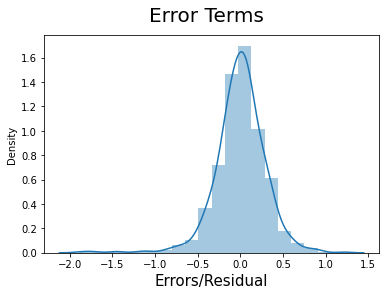

In [220]:
# residual/error terms
res_train_l = y_train - y_pred_train_l

# plotting the distribution of error terms
fig = plt.figure()
sns.distplot(res_train_l, bins = 20)
plt.xlabel('Errors/Residual',fontsize=15)
fig.suptitle('Error Terms',fontsize=20)
plt.show()

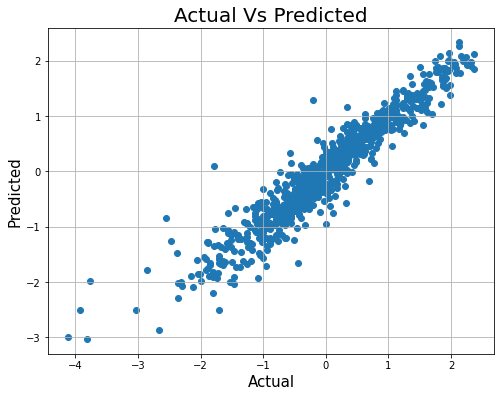

In [221]:
# plotting to validate Linear regression between predicted and actual values
fig = plt.figure(figsize=(8,6))
plt.scatter(y_train,y_pred_train_l)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual Vs Predicted',fontsize=20)
plt.grid(True)
plt.show()

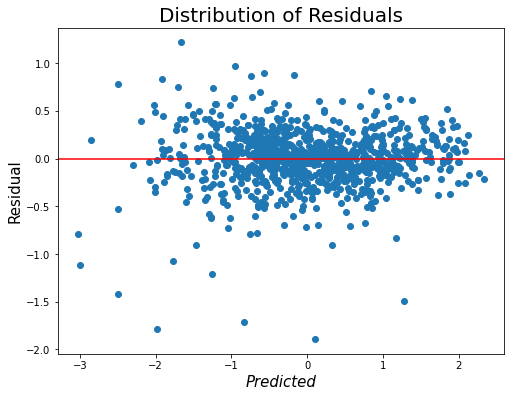

In [222]:
# Scatter plot for predicted values on X - asix and residuals on Y - axis
plt.figure(figsize = (8,6))
plt.scatter(y_pred_train_l,res_train_l)
plt.axhline(y=0,color='r')
plt.title('Distribution of Residuals', fontsize=20)              
plt.xlabel('Predicted', fontstyle='italic', fontsize=15)                      
plt.ylabel('Residual', fontsize=15) 
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 

We can conclude that for training 

*   Residuals are normally distributed with mean 0, so assumptions holds
*   There is Linear regression between predicted and actual
*   Residuals are randomly spread along the 0 line and does not follow any pattern

#### Testing Set

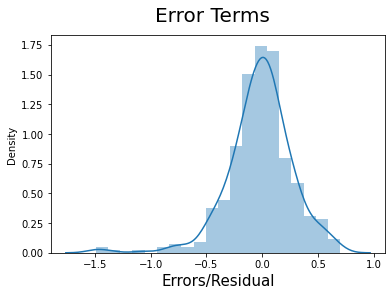

In [223]:
# residual/error terms
res_test_l = y_test - y_pred_test_l

# plotting the distribution of error terms
fig = plt.figure()
sns.distplot(res_test_l, bins = 20)
plt.xlabel('Errors/Residual',fontsize=15)
fig.suptitle('Error Terms',fontsize=20)
plt.show()

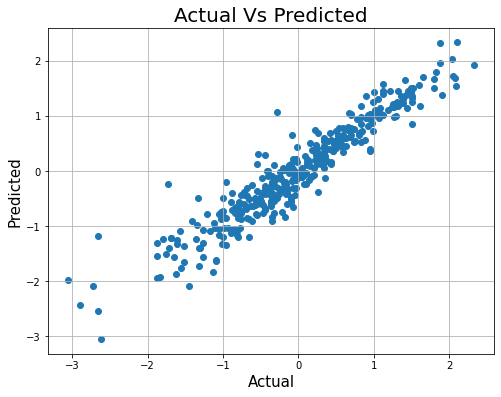

In [224]:
# plotting to validate Linear regression between predicted and actual values
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_test_l)
plt.xlabel('Actual',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title('Actual Vs Predicted',fontsize=20)
plt.grid(True)
plt.show()

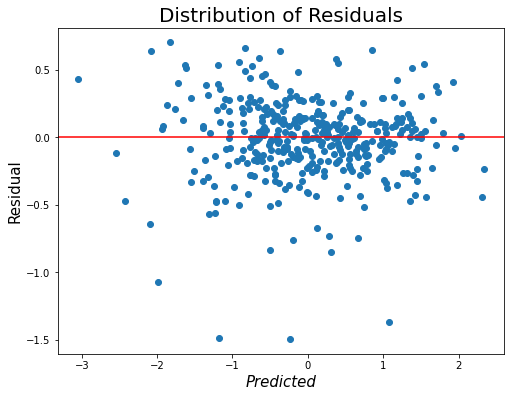

In [225]:
# Scatter plot for predicted values on X - asix and residuals on Y - axis
plt.figure(figsize = (8,6))
plt.scatter(y_pred_test_l,res_test_l)
plt.axhline(y=0,color='r')
plt.title('Distribution of Residuals', fontsize=20)              
plt.xlabel('Predicted', fontstyle='italic', fontsize=15)                      
plt.ylabel('Residual', fontsize=15) 
plt.show()

<font color='Green' size='3'><b>Inference :</b></font> 

We can conclude that for testing set

*   Residuals are normally distributed with mean 0, so assumptions holds
*   There is Linear regression between predicted and actual
*   Residuals are randomly spread along the 0 line and does not follow any pattern

## <font color='33E8FF' size='5'><b>Assignment Questions</b></font>

#### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [226]:
# Optimal value of Alpha for Ridge - 3.0 and Lasso - 0.001.
# Double the values so new vale of alpha for Ridge - 6.0 and Lasso - 0.002 

##### Ridge Regression

In [227]:
##Building model with alpha and Checking the coefficient values with lambda (alpha) = 6
ridge2 = Ridge(alpha=6)
ridge2.fit(X_train_rfe, y_train)

print("Intercept: ", ridge2.intercept_)
print("Coefficients:\n",ridge2.coef_)

Intercept:  -1.0873182864593436
Coefficients:
 [ 0.11317948  0.22482273  0.15692321  0.11268802  0.02189611 -0.00288683
  0.1244467   0.21003474  0.36077364  0.00354966  0.00354966 -0.234066
  0.3246809   0.11083312  0.24077003  0.05705134 -0.09633978  0.00191034
  0.17941024  0.29691001 -0.06907244 -0.19617904  0.14965267  0.06107306
  0.11543138  0.05460871  0.04765192  0.14229541  0.11887599  0.02160647
  0.13824035  0.01188685  0.03170237  0.          0.01154797 -0.17130267
  0.05315298 -0.10342835  0.05704561  0.02329305 -0.07325363  0.02612387
  0.04196494  0.0119519   0.05193829 -0.01778446 -0.03143338  0.
 -0.00614258  0.05299669 -0.02949796  0.00211775  0.03357856 -0.09360123
  0.05927227 -0.00614258  0.06345535 -0.02949796  0.0142326  -0.02574271
  0.          0.14888687  0.07607986 -0.00580324  0.06797448  0.06147886
  0.12938016  0.20067609  0.10096182  0.02513048 -0.12286431  0.06285583
  0.08348978  0.          0.12072471 -0.01857186 -0.03819166  0.
 -0.11189161  0.001438

In [228]:
##Making predictions for train and test sets: Ridge Model
y_pred_train_r2 = ridge2.predict(X_train_rfe)
y_pred_test_r2 = ridge2.predict(X_test_rfe)

##R2 score for Ridge 
r2_score_ridge2_train = r2_score(y_true= y_train, y_pred= y_pred_train_r2)
r2_score_ridge2_test = r2_score(y_true= y_test, y_pred= y_pred_test_r2)

##Check the mean squared error (MSE) for Ridge 
MSE_ridge2_train = mean_squared_error(y_train, y_pred_train_r2)
MSE_ridge2_test = mean_squared_error(y_test, y_pred_test_r2)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge2_train = np.sqrt(MSE_ridge2_train)
RMSE_ridge2_test = np.sqrt(MSE_ridge2_test)


print("For Ridge Regression Model (alpha=6.0):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge2_train,"\nMSE score:",MSE_ridge2_train,
     "\nRMSE score:",RMSE_ridge2_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge2_test,"\nMSE score:",MSE_ridge2_test,
      "\nRMSE score:",RMSE_ridge2_test,"\n","*"*40)

For Ridge Regression Model (alpha=6.0):
 ****************************************

For Train Set:
R2 score: 0.9113880177676933 
MSE score: 0.08861198223230671 
RMSE score: 0.29767764819063375

For Test Set:
R2 score: 0.9017947688151875 
MSE score: 0.08524639318111452 
RMSE score: 0.29196984978095686 
 ****************************************


In [229]:
# creating an data fram for co-efficients
ridge2_df = pd.DataFrame({'Feature':X_train_rfe.columns,'Coeffecient':ridge2.coef_.round(4),
                         'Abs. of Co-efficient':abs(ridge2.coef_.round(4))})
ridge2_df = ridge2_df.sort_values(by='Abs. of Co-efficient',ascending=False) 
ridge2_df.reset_index(drop=True, inplace=True)  
#head values 
ridge2_df.head(10)

,Feature,Coeffecient,Abs. of Co-efficient
0,GrLivArea,0.3608,0.3608
1,MSZoning_FV,0.3247,0.3247
2,Neighborhood_Crawfor,0.2969,0.2969
3,MSZoning_RL,0.2408,0.2408
4,AgeofProperty,-0.2341,0.2341
5,OverallQual,0.2248,0.2248
6,CentralAir,0.2100,0.2100
7,Foundation_PConc,0.2007,0.2007
8,Neighborhood_MeadowV,-0.1962,0.1962
9,SaleCondition_Partial,0.1877,0.1877


In [230]:
print("For Ridge Regression for Alpha = '6.0'")
print("The most important 10 predictor variables are:\n\n",
      ridge2_df[['Feature']].iloc[:10])


For Ridge Regression for Alpha = '6.0'
The most important 10 predictor variables are:

                  Feature
0              GrLivArea
1            MSZoning_FV
2   Neighborhood_Crawfor
3            MSZoning_RL
4          AgeofProperty
5            OverallQual
6             CentralAir
7       Foundation_PConc
8   Neighborhood_MeadowV
9  SaleCondition_Partial



##### Lasso Regression

In [231]:
##Checking the coefficient values with lambda (alpha) = 0.002

lasso2 = Lasso(alpha=0.002)
lasso2.fit(X_train_rfe, y_train)

print("Intercept: ", lasso2.intercept_)
print("Coefficients:\n",lasso2.coef_)

Intercept:  -0.7576580992466284
Coefficients:
 [ 1.03907448e-01  2.40048233e-01  1.58878936e-01  1.19487266e-01
  1.68082383e-02 -0.00000000e+00  1.19679604e-01  1.80990963e-01
  3.57075252e-01  5.65192470e-03  4.97261754e-17 -2.36870266e-01
  2.73724894e-01  0.00000000e+00  1.94544009e-01 -0.00000000e+00
 -3.89974020e-02  0.00000000e+00  1.59089238e-01  2.97243474e-01
 -2.39656966e-02 -1.07010194e-01  1.20258907e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00674369e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.15303927e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  9.87518434e-03 -2.45900770e-02  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.0000000

In [232]:
##Making predictions for train and test sets: Laso Model
y_pred_train_l2 = lasso2.predict(X_train_rfe)
y_pred_test_l2 = lasso2.predict(X_test_rfe)

##R2 score for Ridge 
r2_score_lasso2_train = r2_score(y_true= y_train, y_pred= y_pred_train_l2)
r2_score_lasso2_test = r2_score(y_true= y_test, y_pred= y_pred_test_l2)

##Check the mean squared error (MSE) for Ridge 
MSE_lasso2_train = mean_squared_error(y_train, y_pred_train_l2)
MSE_lasso2_test = mean_squared_error(y_test, y_pred_test_l2)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso2_train = np.sqrt(MSE_lasso2_train)
RMSE_lasso2_test = np.sqrt(MSE_lasso2_test)


print("For Lasso Regression Model (alpha=0.002):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso2_train,"\nMSE score:",MSE_lasso2_train,
     "\nRMSE score:",RMSE_lasso2_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso2_test,"\nMSE score:",MSE_lasso2_test,
      "\nRMSE score:",RMSE_lasso2_test,"\n","*"*40)

For Lasso Regression Model (alpha=0.002):
 ****************************************

For Train Set:
R2 score: 0.9041586149624965 
MSE score: 0.09584138503750356 
RMSE score: 0.3095825980857186

For Test Set:
R2 score: 0.9002818279060192 
MSE score: 0.08655969140409855 
RMSE score: 0.29421028432755125 
 ****************************************


In [233]:
# creating an data fram for co-efficients
lasso2_df = pd.DataFrame({'Feature':X_train_rfe.columns,'Coeffecient':lasso2.coef_.round(4),
                         'Abs. of Co-efficient':abs(lasso2.coef_.round(4))})
lasso2_df = lasso2_df.sort_values(by='Abs. of Co-efficient',ascending=False) 
lasso2_df.reset_index(drop=True, inplace=True)  
#head values 
lasso2_df.head(10)

,Feature,Coeffecient,Abs. of Co-efficient
0,GrLivArea,0.3571,0.3571
1,Neighborhood_Crawfor,0.2972,0.2972
2,MSZoning_FV,0.2737,0.2737
3,SaleCondition_Partial,0.2727,0.2727
4,OverallQual,0.2400,0.2400
5,AgeofProperty,-0.2369,0.2369
6,MSZoning_RL,0.1945,0.1945
7,Foundation_PConc,0.1927,0.1927
8,CentralAir,0.1810,0.1810
9,GarageType_None,-0.1664,0.1664


In [234]:
print("For Lasso Regression for Alpha = '0.002'")
print("The most important 10 predictor variables are:\n\n",
      lasso2_df[['Feature']].iloc[:10])


For Lasso Regression for Alpha = '0.002'
The most important 10 predictor variables are:

                  Feature
0              GrLivArea
1   Neighborhood_Crawfor
2            MSZoning_FV
3  SaleCondition_Partial
4            OverallQual
5          AgeofProperty
6            MSZoning_RL
7       Foundation_PConc
8             CentralAir
9        GarageType_None


#### You will now have to create another lasso model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [235]:
# 5 important lasso features
#head values 
lasso_df.head(5)

,Feature,Coeffecient,Abs. of Co-efficient
0,MSZoning_FV,0.4380,0.4380
1,GrLivArea,0.3632,0.3632
2,Neighborhood_Crawfor,0.3282,0.3282
3,MSZoning_RL,0.3254,0.3254
4,Functional_Sev,-0.3136,0.3136


In [236]:
# copying the housing data farem
# data info
new_housing_df = housing_df

In [237]:
# checking the values head
new_housing_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,AgeofProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,0,1710,1,0,2,1,3,1,3,0,0,2,548,3,3,0,61,0,0,0,0,0,0,12.247694,5,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,0,1262,0,1,2,0,3,1,2,1,3,2,460,3,3,298,0,0,0,0,0,0,0,12.109011,31,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,0,1786

In [238]:
#droping the top 5 variable identifed above MSZoning_FV,GrLivArea,Neighborhood_Crawfor,MSZoning_RL,Functional_Sev
new_housing_df.drop(columns = ['MSZoning_FV','GrLivArea','Neighborhood_Crawfor','MSZoning_RL','Functional_Sev'],inplace=True)

In [239]:
# checking the values head
new_housing_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,AgeofProperty,MSZoning_RH,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,0,1,0,2,1,3,1,3,0,0,2,548,3,3,0,61,0,0,0,0,0,0,12.247694,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,0,0,1,2,0,3,1,2,1,3,2,460,3,3,298,0,0,0,0,0,0,0,12.109011,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,0,1,0,2,1,3,1,3,1,3,2,608,3,3,0,42,0,0,0,0,0,0,12.317167,7,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0

In [240]:
new_housing_df.shape

(1289, 190)

In [241]:
# Splittomg train and test data sets, 70% training and 30% for testing the model
df_train, df_test = train_test_split(new_housing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [242]:
#instantiate
scaler = StandardScaler()

In [243]:
#applying to all variable except dummy and 0-1 variables
num_col = ['MSSubClass','LotFrontage','LotArea','LotShape','LandSlope','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
           'BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC',
           'LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','KitchenQual','Fireplaces','FireplaceQu','GarageFinish','GarageArea','GarageQual',
           'GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC',
           'MiscVal','SalePrice','AgeofProperty']
#           
# scaling the collumns in the train data set using fit_transform.
df_train[num_col] = scaler.fit_transform(df_train[num_col])

In [244]:
#scaling on test data
df_test[num_col] = scaler.transform(df_test[num_col])

In [245]:
# Dividing into X & Y datasets for model building
#Training set
y_train = df_train.pop('SalePrice')
X_train = df_train

In [246]:
#Testing Set
y_test = df_test.pop('SalePrice')
X_test = df_test

In [247]:
#instantiate RFE with 50 variables
lm = LinearRegression()
#RFE inistantiation
rfe = RFE(lm,step=50)

In [248]:
# fit the rfe
rfe = rfe.fit(X_train,y_train)

In [249]:
#Zipping into list the columns, supported columns and reank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 3),
 ('LotFrontage', False, 3),
 ('LotArea', True, 1),
 ('LotShape', False, 3),
 ('LandSlope', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 3),
 ('ExterQual', False, 3),
 ('ExterCond', False, 3),
 ('BsmtQual', False, 3),
 ('BsmtCond', False, 3),
 ('BsmtExposure', False, 3),
 ('BsmtFinType1', False, 3),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 3),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 3),
 ('CentralAir', True, 1),
 ('LowQualFinSF', False, 3),
 ('BsmtFullBath', False, 2),
 ('BsmtHalfBath', False, 3),
 ('FullBath', True, 1),
 ('HalfBath', False, 2),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 3),
 ('KitchenQual', False, 3),
 ('Fireplaces', False, 3),
 ('FireplaceQu', False, 3),
 ('GarageFinish', False, 3),
 ('GarageArea', False, 2),
 ('GarageQual', False, 2),
 ('GarageCond', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('

In [250]:
# extracting rfe supported columns
rfe_cols = df_train.columns[rfe.support_]
rfe_cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', 'FullBath', 'PoolArea',
       'PoolQC', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'Ho

In [251]:
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]

##### <font color='33E8FF' size='5'><b>Lasso Regression</b></font>


In [252]:
## list of alphas/lambda parameter: Lasso Regression 

params = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,20, 50, 100 ]}

lasso = Lasso()

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)         
#   
lasso_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [253]:
# betst hyperparameter alpha
print(lasso_model_cv.best_estimator_)

Lasso(alpha=0.001)


In [254]:
##Display the results
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013209,0.000727,0.003951,0.000045,0.001,{'alpha': 0.001},-0.294820,-0.279262,-0.295717,-0.282139,-0.281072,-0.286602,0.007142,1,-0.259735,-0.262267,-0.260481,-0.262747,-0.263847,-0.261816,0.001504
1,0.008211,0.001980,0.003800,0.000305,0.01,{'alpha': 0.01},-0.304174,-0.320761,-0.337758,-0.296003,-0.304237,-0.312587,0.014939,2,-0.302747,-0.303339,-0.297267,-0.304929,-0.301749,-0.302006,0.002585
2,0.007844,0.001866,0.003841,0.000234,0.1,{'alpha': 0.1},-0.346328,-0.394533,-0.389999,-0.356782,-0.364006,-0.370330,0.018827,3,-0.373272,-0.359673,-0.359278,-0.368061,-0.371145,-0.366286,0.005804
3,0.007098,0.000465,0.003854,0.000277,0.2,{'alpha': 0.2},-0.392238,-0.447956,-0.450990,-0.405641,-0.438417,-0.427048,0.023705,4,-0.430154,-0.420404,-0.420820,-0.422229,-0.431110,-0.424943,0.004694
4,0.009979,0.003750,0.006073,0.003605,0.3,{'alpha': 0.3},-0.446707,-0.517805,-0.518550,-0.461631,-0.508454,-0.490629,0.030351,5,-0.492245,-0.488755,-0.484082,-0.489399,-0.490102,-0.488917,0.002687
5,0.007318,0.000342,0.005198,0.001934,0.4,{'alpha': 0.4},-0.493017,-0.580084,-0.574311,-0.510662,-0.568154,-0.545246,0.036075,6,-0.545635,-0.545072,-0.536130,-0.548460,-0.545425,-0.544144,0.004185
6,0.006757,0.000194,0.003773,0.000149,0.5,{'alpha': 0.5},-0.533496,-0.638894,-0.622297,-0.556584,-0.621985,-0.594651,0.041612,7,-0.591140,-0.596214,-0.584780,-0.600081,-0.596677,-0.593778,0.005329
7,0.007035,0.000380,0.003799,0.000056,0.6,{'alpha': 0.6},-0.581922,-0.707705,-0.675808,-0.617563,-0.684090,-0.653418,0.046447,8,-0.645773,-0.656245,-0.642978,-0.660467,-0.654510,-0.651995,0.006575
8,0.006663,0.000128,0.003669,0.000047,0.7,{'alpha': 0.7},-0.635231,-0.781500,-0.732781,-0.683538,-0.750822,-0.716775,0.051689,9,-0.706204,-0.720619,-0.706332,-0.726571,-0.717139,-0.715373,0.008023
9,0.010158,0.006781,0.005841,0.004229,0.8,{'alpha': 0.8},-0.692762,-0.839589,-0.793085,-0.754367,-0.816180,-0.779197,0.051566,10,-0.769862,-0.772613,-0.773137,-0.794133,-0.778331,-0.777615,0.008701


In [255]:
##Checking the coefficient values with lambda (alpha) = 0.001

lasso = Lasso(alpha=0.001)
lasso.fit(X_train_rfe, y_train)

print("Intercept: ", lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercept:  -0.46449021749638336
Coefficients:
 [ 1.42872056e-01  3.31070978e-01  1.27958492e-01  1.23317194e-01
  1.53630152e-02 -0.00000000e+00  2.23742829e-01  2.90090279e-01
  1.32338668e-01  1.15517695e-02  9.58828976e-17 -9.06125272e-02
 -1.22605515e-01 -0.00000000e+00  0.00000000e+00 -2.94190426e-01
 -1.95294854e-01 -9.88404462e-02 -2.30448577e-01 -1.43565332e-01
 -5.24630453e-01 -3.61834528e-01 -2.22755800e-01 -1.52553402e-01
 -0.00000000e+00 -1.32941954e-01  1.43244125e-01 -4.23504983e-01
 -1.47597979e-01 -1.53336510e-01 -7.27086319e-02  4.47813199e-02
 -5.13998995e-02  0.00000000e+00  1.57655181e-02  1.22630487e-01
  3.96737976e-02  1.50298416e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.28263584e-01
 -8.91400780e-02 -2.26292083e-01 -2.91960201e-01  0.00000000e+00
 -1.74956616e-01 -0.00000000e+00  0.00000000e+00  1.34791181e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.000000

In [256]:
##Making predictions for train and test sets: Laso Model
y_pred_train_l = lasso.predict(X_train_rfe)
y_pred_test_l = lasso.predict(X_test_rfe)

##R2 score for Ridge 
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Ridge 
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)


print("For Lassp Regression Model (alpha=0.001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lassp Regression Model (alpha=0.001):
 ****************************************

For Train Set:
R2 score: 0.8750389424778775 
MSE score: 0.12496105752212247 
RMSE score: 0.353498313322882

For Test Set:
R2 score: 0.8730089346784162 
MSE score: 0.11023374370474973 
RMSE score: 0.3320146739298577 
 ****************************************


In [257]:
# creating an data fram for co-efficients
lasso_df = pd.DataFrame({'Feature':X_train_rfe.columns,'Coeffecient':lasso.coef_.round(4),
                         'Abs. of Co-efficient':abs(lasso.coef_.round(4))})
lasso_df = lasso_df.sort_values(by='Abs. of Co-efficient',ascending=False) 
lasso_df.reset_index(drop=True, inplace=True)  
#head values 
lasso_df.head(10)

,Feature,Coeffecient,Abs. of Co-efficient
0,Neighborhood_IDOTRR,-0.5246,0.5246
1,Neighborhood_OldTown,-0.4235,0.4235
2,SaleCondition_Partial,0.3645,0.3645
3,Neighborhood_MeadowV,-0.3618,0.3618
4,Foundation_Slab,0.3512,0.3512
5,OverallQual,0.3311,0.3311
6,Heating_Grav,-0.3198,0.3198
7,Neighborhood_BrDale,-0.2942,0.2942
8,HouseStyle_1Story,-0.2920,0.2920
9,CentralAir,0.2901,0.2901


In [258]:
print("The most important 5 predictor variables after removing initials 5 variables are:\n\n",
      lasso_df[['Feature']].iloc[:5])


The most important 5 predictor variables after removing initials 5 variables are:

                  Feature
0    Neighborhood_IDOTRR
1   Neighborhood_OldTown
2  SaleCondition_Partial
3   Neighborhood_MeadowV
4        Foundation_Slab
